### TMA4320 - Industriell Matematikk Prosjekt

#### Introduction
In this project, the implementation and application of non-negative matrix factorization (NMF) will be studied. This is a form of dimensionality reduction; an important subset of machine learning. The goal of dimensionality reduction is to transform high-dimensional data into
low-dimensional data, in order to understand, store and recall meaningful information about the original data. This method will be applied to datasets of images, in order to reduce the necessary size of storage, by efficiently compressing the data into decomposed matrices, which combined contains less components than the original dataset. 

Utilizing techniques such as NMF can thus drastically reduce the amount of data necessary to store, which in turn can make large datasets more manageable. The resulting decomposed matrices from the NMF-algorithm may also allow us to learn underlying features of the dataset, which are useful to better understand large amount of data, and make predictions based on potential "groups" existing in the dataset.

#### Non-negative Matrix factorization
Non-negative matrix factorization is a recently developed technique by Lee and Sung (1999) for finding part-based, linear representations of non-negative data. The method is based on the psychological and physiological evidence of part-based representations in the brain, speculating that the perception of the whole is based on the perception of its parts. NMF is a representation which makes latent structure in the data explicit, and allows the application of further computational methods by reducing the dimensionality of the data. The non-negative constraints allow only additive, not subtractive, combinations. 

Given a non-negative $m \times n$ matrix $A$ of data, Lee and Sung's NMF-algorithm finds an approximate factorization $A \approx WH$, where $A$ is decomposed into the non-negative $m \times d$ matix $W$ and non-negative $d \times n$ matrix $H$, where $d$ can be significantly smaller than both $m$ and $n$. The NMF is one of many possible methods of matrix factorization. It is preferable to eigenvalue decomposition, which only exists if $A$ is square and diagonalizable. Singular value decomposition (SVD) is an incredibly useful factorization method in many fields, but may result in large matrices containing redundant information. Reduced SVD is variant of SVD which removes the least important parts of the SVD, while still allowing for a perfect reconstruction of the original dataset. This is a kind of dimensionality reduction which removes superfluous dimensions to receive a more compact representation of $A$. Further on, certain "useful" information can be discarded, only allowing the most important components in the factorization for reconstructing $A$, resulting in a truncated SVD. 

The matrix $WH = A_{NMF}$ is the NMF-reconstruction of an original matrix $A$ of data. The $i$-th column of $A_{NMF}$ will be a non-negative linear combination of the columns of $W$ and the $i$-th column of $H$; $a_i=Wh_i$. The column-vectors of $W$ becomes an approximate non-negative basis-vector for the range of $A$, and can contain additional hidden features of the original dataset. The $d$ columns of $W$ are called basis-images, and each column of $H$ is called an encoding. The linear combination of the of the basis-images and the encoding-coefficients will then result in the data-reconstruction.

The NMF of an $m \times n$ matrix $A$ can be obtained by solving the problem $\displaystyle \min_{W,H} \| A - WH \|_F$ such that $W$,$H$ are non-negative $m \times d$ and $d \times n$ matrices, using the Frobenius norm. The NMF of a matrix is a non-unique approximation, and there may be infinitely many solutions $W$ and $H$. Wishing for a small $d$ also leads to a constrained optimization problem, which are often impossible to solve analytically, and hard to solve numerically. A rank $d$ matrix $A$ can be perfectly recreated by a truncated SVD with $d$ components, but there's no guarantee for a perfect recreation by an NMF, unless the NMF captures the non-negative features of $A$.

A non-negative matrix factorization is still favorable to the singular value decomposition for this project, because it will be applied to datasets of images. Images are non-negative, making a non-negative decomposition easier to interpret, and the factorization can itself be represented as images. It will also let us exclude redundant information in the original dataset, in addition to produce interesting basis vectors stored in $W$. First some of the properties of the NMF-algorithm, proposed by Lee and Sung, will be investigated. Then it will be applied to an image-dataset to study its applications and benefits.

#### The NMF-algorithm and Properties of $W$ and $H$
The numerical algorithm used to update $W$ and $H$ is given by:

$\displaystyle (H_{k+1})_{ij} = (H_k)_{ij}\cdot\frac{(W^T_k A)_{ij}}{(W^T_k W_k H_k)_{ij}}$

$\displaystyle (W_{k+1})_{ij} = (W_k)_{ij}\cdot\frac{(AH^T_{k+1})_{ij}}{(W_k H_{k+1} H^T_{k+1})_{ij}}$

which is a multiplicative elementwise update rule, where $k$ denotes the iteration. The algorithm converges to a **local** minimizer of $\displaystyle \min_{W,H} \| A - WH \|_F$, where each update satisfies $\displaystyle \| A-W_{k+1}H_{k+1}\|_F \leq \| A-W_kH_k\|_F$, making the NMF only an approximation and not a perfect reconstruction of $A$. The speed at which the algorithm converges will depend on the initial conditions. The error of the NMF will thus depend on how suitable $A$ is for the non-negative factorization, and whether the algorithm converges to a good solution.

Using the symbols $\odot$ for elementwise multiplication and $\oslash$ for elementwise division, the algorithm can be written in the form:

$\displaystyle H_{k+1} = H_k \odot (W^T_k A) \oslash (W^T_k W_k H_k)$

$\displaystyle W_{k+1} = W_k \odot (A H^T_{k+1}) \oslash (W_k H_{k+1} H^T_{k+1})$

This algorithm requires that $W$ and $H$ are initialized as positive matrices, to ensure that the iterates and the subsequent final factorization results in positive matrices and a positive reconstruction $A_{NMF}=WH$. If assumed that $A$ is non-negative and that $W_0$ and $H_0$ are initialized as positive, the properties of multiplication, division and matrix multiplication can be utilized to show that all iterates $W_k$ and $H_k$ are non-negative.

For two arbitrary non-negative matrices $A$ and $B$:

$$
A = 
\begin{bmatrix}
    a_{11} & a_{12} & \dots & a_{1n} \\
    a_{21} & a_{22} & \dots & a_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{m1} & a_{m2} & \dots & a_{mn}
\end{bmatrix}
\qquad B = 
\begin{bmatrix}
    b_{11} & b_{12} & \dots & b_{1n} \\
    b_{21} & b_{22} & \dots & b_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    b_{m1} & b_{m2} & \dots & b_{mn}
\end{bmatrix}
$$
$$
\displaystyle \{A, B  \in \mathbb{R}^{m \times n} \hspace{0.1cm}|\hspace{0.1cm} m, n \in \mathbb{N},\hspace{0.1cm} m\neq n,\hspace{0.1cm} a_{ij}, b_{ij} > 0,\hspace{0.1cm} i = 1, 2, \hspace{0.1cm}\dots\hspace{0.1cm} , m,\hspace{0.1cm} j = 1, 2, \hspace{0.1cm}\dots\hspace{0.1cm} , n \}
$$
$$
\displaystyle\implies A\odot B,\hspace{0.1cm} a_{ij}\cdot b_{ij} > 0,\quad A\oslash B,\hspace{0.1cm} a_{ij}/b_{ij} > 0, \quad B\oslash A,\hspace{0.1cm} b_{ij}/a_{ij} > 0.
$$

The simplest example will be a matrix multiplication of a $2 \times 2$ matrix:
$$
C = 
\begin{bmatrix}
    c_{11} & c_{12} \\
    c_{21} & c_{22} 
\end{bmatrix}
\qquad D = 
\begin{bmatrix}
    d_{11} & d_{12} \\
    d_{21} & d_{22}
\end{bmatrix}
$$

$$
\displaystyle \{C, D \in \mathbb{R}^{2 \times 2}\hspace{0.1cm} | \hspace{0.1cm} c_{ij}, d_{ij} > 0, \hspace{0.1cm} i, j = \{1,2\} \}
$$

$$
CD = 
\begin{bmatrix}
    c_{11}d_{11} + c_{12}d_{21} & c_{11}d_{12} + c_{12}d_{22} \\
    c_{21}d_{11} + c_{22}d_{21} & c_{21}d_{12} + c_{22}d_{22}
\end{bmatrix}
$$
$$
\displaystyle c_{ij}d_{ij} > 0, \quad i, j \in \{1, 2\}
$$

The fact that all iterates of $W$ and $H$ are positive can be proven by induction.

For $k = 1$:
$$
\displaystyle H_1 = H_0\odot (W_0^TA)\oslash(W_0^TW_0H_0)
$$
$$
\displaystyle W_{1} = W_0\odot (AH^T_{1}) \oslash (W_0H_{1} H^T_{1})
$$

Which is ok since $W$ and $H$ are initialized as positive and all operations done on these matrices, are proven above to produce only positive numbers and matrices. 
Assuming that $k = n$, check for $k = n+1$:

$$
\displaystyle H_{n+1} = H_n\odot (W_n^TA)\oslash(W_n^TW_nH_n)
$$
$$
\displaystyle W_{n+1} = W_n\odot (AH^T_{n+1}) \oslash (W_nH_{n+1} H^T_{n+1})
$$

Which is ok, since $W$ and $H$ are initialized as positive, and all operations in every iteration produces a positive result as proven above.

$\blacksquare$

While in theory there could be a zero-element in one of the matrices, there will never be one here. This is because $\displaystyle\delta \in [10^{-9}, 10^{-6}]$ is used as an approximation.

Considering the NMF-algorithm:

$\displaystyle H_{k+1} = H_k \odot (W^T_k A) \oslash (W^T_k W_k H_k)$

$\displaystyle W_{k+1} = W_k \odot (A H^T_{k+1}) \oslash (W_k H_{k+1} H^T_{k+1})$

If $\displaystyle (W^T A) \oslash (W^T W H)$ is equal to a matrix of ones, then each element of $H_k$ is multiplied with the number $1$, since elementwise operations are used and not matrix multiplication. This will result in $H_{k+1} = H_k$, meaning that $H_K$ is a fixed point.

This will occur if $WH=A$, as

$\displaystyle H_{k+1} = H_k \odot (W^T_k A) \oslash (W^T_k W_k H_k) = H_k \odot (W^T_k A) \oslash (W^T_k A)$

where the elementwise operations will be 

$\displaystyle (H_{k+1})_{ij} = (H_k)_{ij}\cdot\frac{(W^T_k A)_{ij}}{(W^T_k W_k H_k)_{ij}} = (H_k)_{ij}\cdot\frac{(W^T_k A)_{ij}}{(W^T_k A)_{ij}} = (H_k)_{ij}\cdot 1 = (H_k)_{ij}$

thus $H_{k+1} = H_k$.

Since the matrices are operated upon elementwise, and each iteration depends on the preceding one, setting the initializations $H_0$ and $W_0$ equal to matrices containing only zeros could result in each iteration remaining as matrices of zero. This would have given a trivial solution, resulting in a poor estimate for $A=WH$. The more alarming outcome of such an initialization would be instances of division by zero. One can avoid this by adding a small number $\displaystyle \delta \in [10^{-9},10^{-6}]$ to each element of the denominator whenever the division is calculated, which may also have additional beneficial effects to the algorithm. 

#### Implementation and application of NMF

In [ ]:
# Importing relevant libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2

import os
import time
from IPython import display

In [ ]:
# Handed out code for plotting images

def load_images(N):
    """
    Loads images from cryptopunk dataset. The loading order is deterministic,
    so for a certain N the exact same images will be loaded.
    Input:
        N, integer, number of images to load
    Output:
        faces, (24,24,4,N) numpy array containing images
    """

    # Allocate array to store images
    faces = np.zeros((24, 24, 4, N))

    # Iteration variable
    i = 0

    # Iterate over folders
    for subdir, dirs, files in os.walk('./imgs'):

        # Iterate over files
        for file in files:

            # Filepath to load from
            filepath = subdir + os.sep + file

            # Make sure that the file is a .png
            if filepath[-3:] == 'png':
                # Load the image
                im = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)

                # Convert it to RGBA and rescale pixels
                faces[:, :, :, i] = cv2.cvtColor(im, cv2.COLOR_BGRA2RGBA) / 255.0

                i += 1
            if i == N:
                break
    return faces


# Number of faces to keep in final array
N = 500

# Load all 10000 images
faces = load_images(10000)

# Select N random images
choices = np.random.choice(faces.shape[-1], N, replace=False)
faces = faces[:, :, :, choices]

# Check that the shape is correct
print(faces.shape)


# Code for plotting images
def plotimgs(imgs, nplot=8, rescale=False, filename=None):
    """
    Plots nplot*nplot images on an nplot x nplot grid.
    Saves to given filename if filename is given
    Can also rescale the RGB channels
    input:
        imgs: (24,24,4,N) or (24,24,3,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
        rescale: bool
        filename: string, figure will be saved to this location. Should end with ".png".
    """
    # Some of the parameters of matplotlib will be changed, so the initial ones are stored
    oldparams = plt.rcParams['figure.figsize']

    # New params to make better plot. There definitely exists better ways of doing this
    plt.rcParams['figure.figsize'] = (16, 16)

    # Initialize subplots
    fig, axes = plt.subplots(nplot, nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot ** 2):

        # Indices
        i = idx // nplot;
        j = idx % nplot

        # Remove axis
        axes[i, j].axis('off')

        # Rescale RGB channels by dividing my maximal value
        if rescale:
            scaled_img = np.copy(imgs[:, :, :, idx])
            scaled_img[:, :, :3] = scaled_img[:, :, :3] / np.max(scaled_img[:, :, :3])
            axes[i, j].imshow(scaled_img)
        else:
            axes[i, j].imshow(imgs[:, :, :, idx])

    # Tight layout so images will appear closer together
    plt.tight_layout()

    # Save if filename is given
    if filename is not None:
        plt.savefig(filename)

    plt.show()

    # Return to old parameters
    plt.rcParams['figure.figsize'] = oldparams

(24, 24, 4, 500)


To investigate some of the properties of the NMF-algorithm, it will be tested on the four matrices $A_1$, $A_2$, $A_3$, $A_4$ defined below. While there exists converge criterions that can be used to determine whether or not the algorithm has converged, these optimality conditions can be difficult and expensive to calculate. A maximum number of iterations is therefore applied to ensure that the algorithm has converged, here set to $1000$.

In [ ]:
A1 = np.array([[1,0],[0,1]])
A2 = np.array([[1,2],[1,1],[1,2]])
A3 = np.array([[2,1,1],[2,1,1],[1,1,2]])
A4 = np.array([[2,1,0],[1,2,3],[0,3,3]])

The first step is implementing the NMF algorithm, using Lee and Seung's multiplicative update rule. The function takes in a dataset in the form of a non-negative $m \times n$ matrix $A$ and an integer $d$ of which number of components $A$ will be decomposed into. $W_0$ and $H_0$ are initialized as positive $m \times d$ and $d \times n$ matrices by sampling the elements from a uniform distribution between 0 and 1, and scaling them by multiplying the randomly initialized vectors with $\displaystyle \sqrt{\overline{A}/d}$, where $\overline{A}$ is the mean of the matrix $A$. The matrices are then updated through a maximum number of iterations, to return the decomposition-matrices $W$ and $H$ of the NMF-approximation.

In [ ]:
def NMF(V, d, delta=1e-9, seed=0, Maxiter=1000, as_func_of_it=False, step_start=1, step_end=1000, step_length=1):
    """
    input:
        V: (m,n) input array
        d: Integer, number of components V will be decomposed into
        delta: Float, small number for safe division
        seed: Integer, random seed
        Maxiter: Number of iterations
        as_func_of_it: Wherever the number of iterations vary or not
        step_start: Start of iteration_array
        step_end: End of iteration_array
        step_length: One iteration in iteration_array
    output:
        W: (m,d) array
        H: (d,n) array
        norm_array: norm for each max_iteration
    """
    if seed != 0:
        np.random.seed(seed)

    m, n = np.shape(V)

    W = np.random.uniform(0.0, 1.0, (m, d)) * np.sqrt(np.mean(V) / d)
    H = np.random.uniform(0.0, 1.0, (d, n)) * np.sqrt(np.mean(V) / d)

    if as_func_of_it == True:  # The number of iterations vary
        iteration_array = np.arange(step_start, step_end + step_start, step_length)
        norm_array = np.zeros_like(iteration_array)
        for k, _ in enumerate(iteration_array):
            H = H * (W.T @ V) / ((W.T @ W) @ H + delta)
            W = W * (V @ H.T) / ((W @ H) @ H.T + delta)
            norm_array[k] = np.linalg.norm(V - (W @ H), "fro")
    else:
        norm_array = np.zeros(Maxiter)
        for k in range(Maxiter):
            H = H * (W.T @ V) / ((W.T @ W) @ H + delta)
            W = W * (V @ H.T) / ((W @ H) @ H.T + delta)
            norm_array[k] = np.linalg.norm(V - (W @ H), "fro")
    return W, H, norm_array

The NMF of $A_1$ and $A_2$ are calculated with $d = 1$, given two different random  initializations. $W$, $H$ and $W H$ are then printed, as well as the error $\displaystyle\| A - W H \|_F$, for both experiments.

In [ ]:
d=1

W_a1, H_a1, _ = NMF(A1, d)
print(f'\nA1 = \t\t W = \t\t\t\t H = \t\t\t\t WH = ')
for k in range (np.shape(A1)[0]):
    if k>=np.shape(H_a1)[0]: print(f'{A1[k]}\t\t{W_a1[k]}\t\t\t\t\t\t{(W_a1 @ H_a1)[k]}')
    else: print(f'{A1[k]}\t\t{W_a1[k]}\t\t{H_a1[k]}\t\t{(W_a1 @ H_a1)[k]}')
print(f'∥A - WH∥_F = {np.linalg.norm(A1 - (W_a1 @ H_a1), "fro")}')

W_a1, H_a1, _ = NMF(A1, d)
print(f'\nA1 = \t\t W = \t\t\t\t H = \t\t\t\t WH = ')
for k in range (np.shape(A1)[0]):
    if k>=np.shape(H_a1)[0]: print(f'{A1[k]}\t\t{W_a1[k]}\t\t\t\t\t\t{(W_a1 @ H_a1)[k]}')
    else: print(f'{A1[k]}\t\t{W_a1[k]}\t\t{H_a1[k]}\t\t{(W_a1 @ H_a1)[k]}')
print(f'∥A - WH∥_F = {np.linalg.norm(A1 - (W_a1 @ H_a1), "fro")}')

W_a2, H_a2, _ = NMF(A2, d)
print(f'\nA2 = \t\t W = \t\t\t\t H = \t\t\t\t WH = ')
for k in range (np.shape(A2)[0]):
    if k>=np.shape(H_a2)[0]: print(f'{A2[k]}\t\t{W_a2[k]}\t\t\t\t\t\t{(W_a2 @ H_a2)[k]}')
    else: print(f'{A2[k]}\t\t{W_a2[k]}\t\t{H_a2[k]}\t\t{(W_a2 @ H_a2)[k]}')
print(f'∥A - WH∥_F = {np.linalg.norm(A2 - (W_a2 @ H_a2), "fro")}')

W_a2, H_a2, _ = NMF(A2, d)
print(f'\nA2 = \t\t W = \t\t\t\t H = \t\t\t\t WH = ')
for k in range (np.shape(A2)[0]):
    if k>=np.shape(H_a2)[0]: print(f'{A2[k]}\t\t{W_a2[k]}\t\t\t\t\t\t{(W_a2 @ H_a2)[k]}')
    else: print(f'{A2[k]}\t\t{W_a2[k]}\t\t{H_a2[k]}\t\t{(W_a2 @ H_a2)[k]}')
print(f'∥A - WH∥_F = {np.linalg.norm(A2 - (W_a2 @ H_a2), "fro")}')


A1 = 		 W = 				 H = 				 WH = 
[1 0]		[0.4485486]		[1.76896037 0.9025088 ]		[0.7934647  0.40481906]
[0 1]		[0.22884575]						[0.40481906 0.2065353 ]
||A - WH||_F = 1.0

A1 = 		 W = 				 H = 				 WH = 
[1 0]		[0.26238361]		[3.46196989 1.09957776]		[0.90836417 0.28851119]
[0 1]		[0.08333729]						[0.28851119 0.09163583]
||A - WH||_F = 1.0

A2 = 		 W = 				 H = 				 WH = 
[1 2]		[1.11243733]		[0.98904003 1.74683299]		[1.10024505 1.94324222]
[1 1]		[0.67893974]						[0.67149858 1.18599434]
[1 2]		[1.11243733]						[1.10024505 1.94324222]
||A - WH||_F = 0.4111546000651087

A2 = 		 W = 				 H = 				 WH = 
[1 2]		[0.92537709]		[1.1889694  2.09994632]		[1.10024505 1.94324222]
[1 1]		[0.56477365]						[0.67149858 1.18599434]
[1 2]		[0.92537709]						[1.10024505 1.94324222]
||A - WH||_F = 0.4111546000651087


It is observed that the reconstructions $WH$ are in both cases a poor approximation to the original matrices $A_1$ and $A_2$. For the latter, one can see the pattern of $A_2$ forming, since if rounded to one decimal, one would achieve the original parameter. The error is however still quite large. The reconstructions of the different initializations seem identical, which they may be called, since the error differs only in the sixteenth decimal. This is despite of the large difference in the matrices $W$ and $H$. Even though the values change, both $W$s share the same patterns for $A_2$, namely that the top and bottom row are identical, like in the original matrix. 

In the case of $A_1$, there are few patterns and similarities. Primarily, the reconstruction $WH$ does not fit the original matrix well, which results in a large error of $\displaystyle \| A - WH \|_F=1$. The NMF-algorithm does however manage to identify that the elements along the anti-diagonal are identical, and that one of elements along the diagonal should be closer to one. Still there are no elements equal to zero in either $W$, $H$ or $WH$. 

In all the instances above, the matrices of $W$ and $H$ are quite different. In $A_1$ this is also true for the reconstructions, while in the case of $A_2$, the $WH$s are almost identical to each other. This indicates that the different matrices $W$ and $H$ may lead to the same $WH$, consequently non-uniqueness. Other identical properties are errors, $\| A - WH \|_F$. They are approximately the same for both instances of $A_1$ and $A_2$, which indicates that these matrices have a constant error given this method with $d=1$.

The NMF of $A_1$ and $A_2$ is then calculated again, still given two different random initializations, now with $d=2$.

In [ ]:
d = 2

W_a1, H_a1, _ = NMF(A1, d)
print(f'A1 = \t\t W = \t\t\t\t H = \t\t\t\t WH = ')
for k in range (np.shape(A1)[0]):
    print(f'{A1[k]}\t\t{W_a1[k]}\t\t{H_a1[k]}\t\t{(W_a1 @ H_a1)[k]}')
print(f'∥A - WH∥_F = {np.linalg.norm(A1 - (W_a1 @ H_a1), "fro"):.2e}')

W_a1, H_a1, _ = NMF(A1, d)
print(f'\nA1 = \t\t W = \t\t\t\t H = \t\t\t\t WH = ')
for k in range (np.shape(A1)[0]):
    print(f'{A1[k]}\t\t{W_a1[k]}\t\t{H_a1[k]}\t\t{(W_a1 @ H_a1)[k]}')
print(f'∥A - WH∥_F = {np.linalg.norm(A1 - (W_a1 @ H_a1), "fro"):.2e}')

W_a2, H_a2, _ = NMF(A2, d)
print(f'\nA2 = \t\t W = \t\t\t\t H = \t\t\t\t WH = ')
for k in range (np.shape(A2)[0]):
    if k>=np.shape(H_a2)[0]: print(f'{A2[k]}\t\t{W_a2[k]}\t\t\t\t\t\t{(W_a2 @ H_a2)[k]}')
    else: print(f'{A2[k]}\t\t{W_a2[k]}\t\t{H_a2[k]}\t\t{(W_a2 @ H_a2)[k]}')
print(f'∥A - WH∥_F = {np.linalg.norm(A2 - (W_a2 @ H_a2), "fro"):.2e}')

W_a2, H_a2, _ = NMF(A2, d)
print(f'\nA2 = \t\t W = \t\t\t\t H = \t\t\t\t WH = ')
for k in range (np.shape(A2)[0]):
    if k>=np.shape(H_a2)[0]: print(f'{A2[k]}\t\t{W_a2[k]}\t\t\t\t\t\t{(W_a2 @ H_a2)[k]}')
    else: print(f'{A2[k]}\t\t{W_a2[k]}\t\t{H_a2[k]}\t\t{(W_a2 @ H_a2)[k]}')
print(f'∥A - WH∥_F = {np.linalg.norm(A2 - (W_a2 @ H_a2), "fro"):.2e}')

A1 = 		 W = 				 H = 				 WH = 
[1 0]		[0.59472139 0.        ]		[1.68145962 0.        ]		[1. 0.]
[0 1]		[0.         0.56721786]		[0.         1.76299102]		[0. 1.]
||A - WH||_F = 8.22e-10

A1 = 		 W = 				 H = 				 WH = 
[1 0]		[0.         1.23337671]		[0.         2.03236583]		[1. 0.]
[0 1]		[0.4920374 0.       ]		[0.81078229 0.        ]		[0. 1.]
||A - WH||_F = 1.33e-09

A2 = 		 W = 				 H = 				 WH = 
[1 2]		[0.02834146 0.4152765 ]		[2.90854398 1.55663471]		[1. 2.]
[1 1]		[0.24371    0.13177381]		[2.20953417 4.70983232]		[1. 1.]
[1 2]		[0.02834146 0.41527651]						[1. 2.]
||A - WH||_F = 2.26e-09

A2 = 		 W = 				 H = 				 WH = 
[1 2]		[0.47231148 0.73827027]		[0.90362122 0.28692399]		[1. 2.]
[1 1]		[0.84934389 0.29946965]		[0.77642206 2.52547418]		[1. 1.]
[1 2]		[0.47231148 0.73827027]						[1. 2.]
||A - WH||_F = 1.24e-09


Increasing $d$ with an increment of just one, the NMF-method dramatically reduces the error $\displaystyle \| A - WH \|_F$ to an error as low as $[10^{-10}, 10^{-9}]$, which yields approximately the same matrices as the ones given as parameters. The $W$- and $H$-matrices are however quite distinguishable. Nevertheless, there are some similarities. First of all, both $W$ and $H$ contains zeros along the same diagonal in the NMF for $A_1$, as a opposed to when $d=1$. Which of the diagonals doesn't seem to matter that much, as both of the instances yields the same reconstruction  $WH$, with a slightly different error, which can be caused by the other numbers as well. In the case of $A_2$ it  is observed that the upper and the lower rows are identical, in contrast to the middle one. Here the values also vary, but since the result differentiate at a level of $1e-10$, this strengthens the theory of non-uniqueness of NMF. The reason for the large improvement of data representation is due to the doubling of the value $d$, which leads to a doubling of the sizes of $W$ and $H$, which again leads to a quadruple of the amount of data stored about the matrices. The $W$ matrix actually has the same size as the original one. This means that the method does not reduce the data, but expands it by adding a matrix $H$, causing a low error.

As stated in a previous section, a rank $d$ matrix $A$ can be perfectly recreated by a truncated SVD with $d$ components. A rank $d$ matrix can however not necessarily be perfectly recreated by an NMF with $d$ components, but it is expected that as $d$ increases up to the rank of $A$, the NMF yields a better approximation to $A$.

**Theorem 1:** Let $A$ be a $m \times n$ matrix. Then the rank of $A$ is equal to the dimension of the vector space spanned by its column, which is identical to the dimension of the vector space spanned by its rows:

$\displaystyle \text{rank }A = \text{dim Col }A = \text{dim Row }A$

**Theorem 2:** Let $A$ be an $m \times n$ matrix, and let $E$ be the gauss-eliminated $A$. Then:

(a) The dimension of the vector space spanned by the columns of $A$ is equal to the number of columns with pivotelements in $E$.

(b) The dimension of the vector space spanned by the rows of $A$ is equal to the number of non-zero rows in $E$.

$$ A_3 = \begin{bmatrix} 2&1&1 \\ 2&1&1 \\ 1&1&2 \end{bmatrix} \sim \begin{bmatrix} 1&0&-1 \\ 0&1&3 \\ 0&0&0 \end{bmatrix} \quad \Rightarrow \quad \text{rank } A_3 = 2 $$

$$ A_4 = \begin{bmatrix} 2&1&0 \\ 1&2&3 \\ 0&3&3 \end{bmatrix} \sim \begin{bmatrix} 1&0&0 \\ 0&1&0 \\ 0&0&1 \end{bmatrix} \quad \Rightarrow \quad \text{rank } A_4 = 3 $$

We confirm these calculations of the rank of $A_3$ and $A_4$ numerically, using NumPy's linear algebra library.

In [ ]:
def eigenvalue_finder(A):
    eigenvalues, eigenvectors = np.linalg.eig(A)
    for i in range(len(eigenvalues)):
        if np.abs(eigenvalues[i]) < 1e-10:    #Making elements approximately zero equal to zero
            eigenvalues[i] = 0
    return eigenvalues, eigenvectors

eig_a3, vec_a3 = eigenvalue_finder(A3)  # Finding eigenvalues for the matrix A3
rank_a3 = np.count_nonzero(eig_a3)

eig_a4, vec_a4 = eigenvalue_finder(A4)  # Finding eigenvalues for the matrix A4
rank_a4 = np.count_nonzero(eig_a4)

print(f'Rank(A3) = {rank_a3}, rank(A4) = {rank_a4}.')

Rank(A3) = 2, rank(A4) = 3.


Based on these results, it is expected that the error $\displaystyle \| A_3 - WH \|_F$ will be close to zero for $d=2$ and $\displaystyle \| A_4 - WH \|_F$ close to zero for $d=3$. To confirm this, the implementation of the algorithm is extended so that for each iteration, the value of $\displaystyle \| A - W_kH_k \|_F$ is stored, placed in an array, and returned at the end of the program. The updated NMF-algorithm is tested on $A_3$ and $A_4$ for $d = \{1,2,3\}$, and the error $\displaystyle \| A - W_kH_k \|_F$ is plotted as a function of number of iterations.

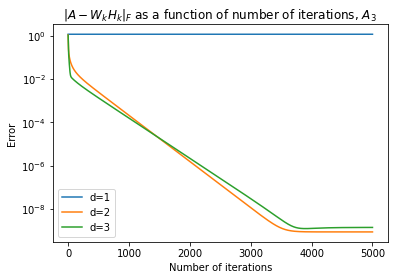

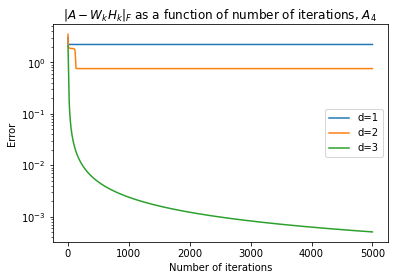

In [ ]:
plt.figure()
for i in range(3):
    _, _, norm_a3 = NMF(A3, i+1, 1e-9, i, 5000)
    plt.plot([i for i in range(1, 5001)], norm_a3, label=f'd={i+1}')
plt.semilogy()
plt.legend(); plt.title('$\| A - W_k H_k \|_F$ as a function of number of iterations, $A_3$')
plt.xlabel('Number of iterations'); plt.ylabel('Error')
plt.show()

plt.figure()
for i in range(3):
    _, _, norm_a4 = NMF(A4, i+1, 1e-9, i, 5000)
    plt.plot([i for i in range(1, 5001)], norm_a4, label=f'd={i+1}')
plt.semilogy()
plt.legend(); plt.title('$\| A - W_k H_k \|_F$ as a function of number of iterations, $A_4$')
plt.xlabel('Number of iterations'); plt.ylabel('Error')
plt.show()

As mentioned previously, it can be shown that the NMF-algorithm converges to a local minimum, where each update satisfies:

$$
\|A - W_{k+1}H_{k+1}\|_F \leq \|A - W_kH_k\|_F \qquad \text{(1)}
$$

The error for $d=1$ converges to a straight line with an error close to one after just a few iterations. This is valid both for $A_3$ and $A_4$. Although the error is quite large for such a small matrix, it does satisfy equation $(1)$, since each new iteration either has a lower error or the same error as the last iteration. 

For the $A_3$ matrix, the errors for $d=2$ and $d=3$ converges very quickly for the first $50$-$100$ iterations. The slopes of the curves then decrease and take on a linear shape. The curves diverge to two very different slope numbers, where the error for $d=3$ converges to a larger value than the error for $d=2$. This is because $\text{rank }A_3 = 2$, and by applying the NMF-algorithm with $d=3$, is not optimal for reconstructing $A_3$. However, by applying NMF with $d = \text{rank }A_3$, the approximation is better, as seen when the error-curves precede about 1500 number of iterations, and converges to different values. It is observed that equation $(1)$ is satisfied for the errors for $d=2$ and $d=3$, as they decrease until they hit each of their minima, and remain constant to the end.

For the $A_4$ matrix, there is a significant gap between errors of $d=2$ and $d=3$. The error for $d=2$ decreases almost vertically, and seems to hit a local minimum after a few iterations. The curve then converges to a value a bit smaller than one, after a few hundred iterations. This looks to be the global minimum since the curve is constant throughout the rest of the iterations. This means that the algorithm for the error for $d=2$ satisfies equation $(1)$. The error for $d=3$ also decreases quickly and looks to be inversely proportional to the number of iterations. This means that it will eventually converge to a value, but after $5000$ iterations, this converging value has not been reached. All inversely proportional functions will decrease with an increasing variable, which here is number of iterations. This means that equation $(1)$ is satisfied, which can also be observed from the curve.

What is also worth noting is the differences in errors for the matrices $A_3$ and $A_4$. For $d=2$ the error converges for $A_4$ thousands of iterations before $A_3$. However, the error for $A_3$ converges to a value about eight orders of magnitude lower than for $A_4$. For $d=3$ the error for $A_4$ converges a lot slower than for $A_3$, and again to a much larger value. This shows that the NMF-algorithm is a better approximation for $A_3$ than for $A_4$. Although the approximation of $A_4$ is pretty good in the case of $d=3$.


#### Images

In this project, a digital image $v$ is represented as a discrete vector (tensor) with a width $m_x$ and height $m_y$. $m_x$ and $m_y$ are integers which together make up the resolution of the image. At each coordinate $v_{ij}$ there exist a small discernible image element, a pixel, that can have up to three color channels. The most common model RGB represents each pixel by three numerical values, one for each of the colors red, green and blue. The linear combination of these three colors can effectively represent color images. An $m_x \times m_y$ RGB image can thus be represented by a $m_x \times m_y \times 3$ array.

An image's bit depth refers to how many bits on the computer are used to store the value for each color channel of each pixel. A bit depth of 8-bit means that each each color of each pixel can have one of $2^8 = 256$ values, i.e. being an integer value between 0 and 255. With three color channels, such as RGB, this is also referred to as 24-bit, as each pixel requires $3 \cdot 8 = 24$ bits of storage. A 24-bit will then correspond to $256^3 = 16, 777, 216$ different colors. As a perfect digital representation of such an image requires a large amount of data storage, it is often more convenient in digital image processing to represent each color channel of each pixel as a real number between 0 and 1, partly ignoring the bit depth. In this project, such a representation of images as non-negative vectors is assumed, allowing for a better investigation of the application of NMF. 

Images may commonly have a fourth "alpha" channel representing the pixel's opacity/transparency. Such an image is called an RGBA (red, green, blue, alpha) image. This allows for different images to be layered on top of each other, adding opacities together. In this project it is assumed that pixel values have an opacity of zero, no transparency, or a value of 1, completely transparent. The opaque pixels constitute the subject of the image, and the transparent pixels constitute the background of the image.

#### CryptoPunks and NMF
Non Fungible Tokens (NFT) are a form of digital currency, intended to be unique digital identifiers. NFTs are tokens that can be used to represent ownership of unique items, allowing things like art, collectibles, real estate, etc. to be tokenized. They can only have one official owner at a time and are secured by the Ethereum blockchain. They are also highly unsustainable from an environmental standpoint, notoriously exploitative of independent artists, and are used as tools for money laundering, tax evasion, and other forms of fraud. The discussion of this topic is strictly done from a mathematical and analytical perspective, and we are in no way endorsing such a concept while in its currently unregulated and detrimental state. 

CryptoPunks is one of the most popular NFTs as of recent years. A CryptoPunk is a digital $24 \times 24$ RGBA image of a so-called "cyberpunk" character, existing as data stored on the Ethereum blockchain. These are the datasets that will be used to analyze and investigate the properties, advantages and/or disadvantages of Non-negative Matrix Factorization. There are 10.000 algorithmically generated unique CryptoPunks. The character's traits are picked from a pool of different hairstyles, headwear, and accessories such as glasses, cigarettes, etc., with some being rarer than others. Some features shared by nearly all the CryptoPunks is a head, eyes, a nose and a mouth. All the characters are perfectly centered in the image, making any shared traits appear at the exact same pixels for different images, allowing us to utilize linear factorization techniques like the NMF-method.

Considering the many features shared between a large number of characters, the NMF-method would hopefully be an effective tool to decompose each image into meaningful image components. The non-negative constraint allows the decomposition of an image to also be represented as an image, where $W$ and $H$ could store information about face shapes, headwear, hairstyles, accessories, colors, etc. Each image could then be described as a linear combination of these different image components, that can be added together to approximate the character. Each CryptoPunk has a height and width of 24 pixels, with 4 color channels, such that a dataset of $N$ RGBA CryptoPunk images can be stored in a $24 \times 24 \times 4 \times N$ array. The NMF algorithm is restricted to an $m \times n$ matrix, so the array must be reshaped before applying NMF, and reshaped back again to a suitable size to be visualized.

#### Application of NMF to CryptoPunks datasets
The approach of applying NMF to this dataset, begins by loading the images and storing them in a $24 \times 24 \times 4 \times N$ array, using the function given by a handed-out code. The opacity is as stated either zero or one for every pixel, making it uninteresting to study by matrix factorization, and the fourth opacity channel is subsequently stored in a $24 \times 24 \times N$ array. The remaining three color channels is then reshaped into a $24 \cdot 24 \cdot 3 \times N = 1728 \times N$ array $A$, on which the NMF will be calculated. The stored opacity channel is added when plotting the reconstructions $WH$. If some pixel values are larger than one, given the assumption images have pixel values between zero and one, the values are either clipped to one. An alternative would be to rescale the images by dividing each pixel value by the maximal pixel value of that image. Rescaling yields a truer presentation of the reconstruction, but also makes the image darker and possibly discolored. The clipping method was therefore chosen to be preferable in this case. This NMF application-approach, suggested by the project description, results in a loss of opacity-information in the columns of $W$. When these columns, which should contain image components, then are plotted, any black pixels will be indiscernible from the background, allowing us only to observe the non-black hidden features of $W$.

To get to know the potential characteristics and looks of the CryptoPunks dataset, a set of 64 different images is plotted as a $8 \times 8$ grid of subplots, using the handed-out code. Repeating hairstyles, haircolors, skincolors, face-shapes, cigarettes, headwear, facemasks and more can be observed. While each character has a unique combination of features, the pool of traits those are takes from could hopefully be recognized by a computer.

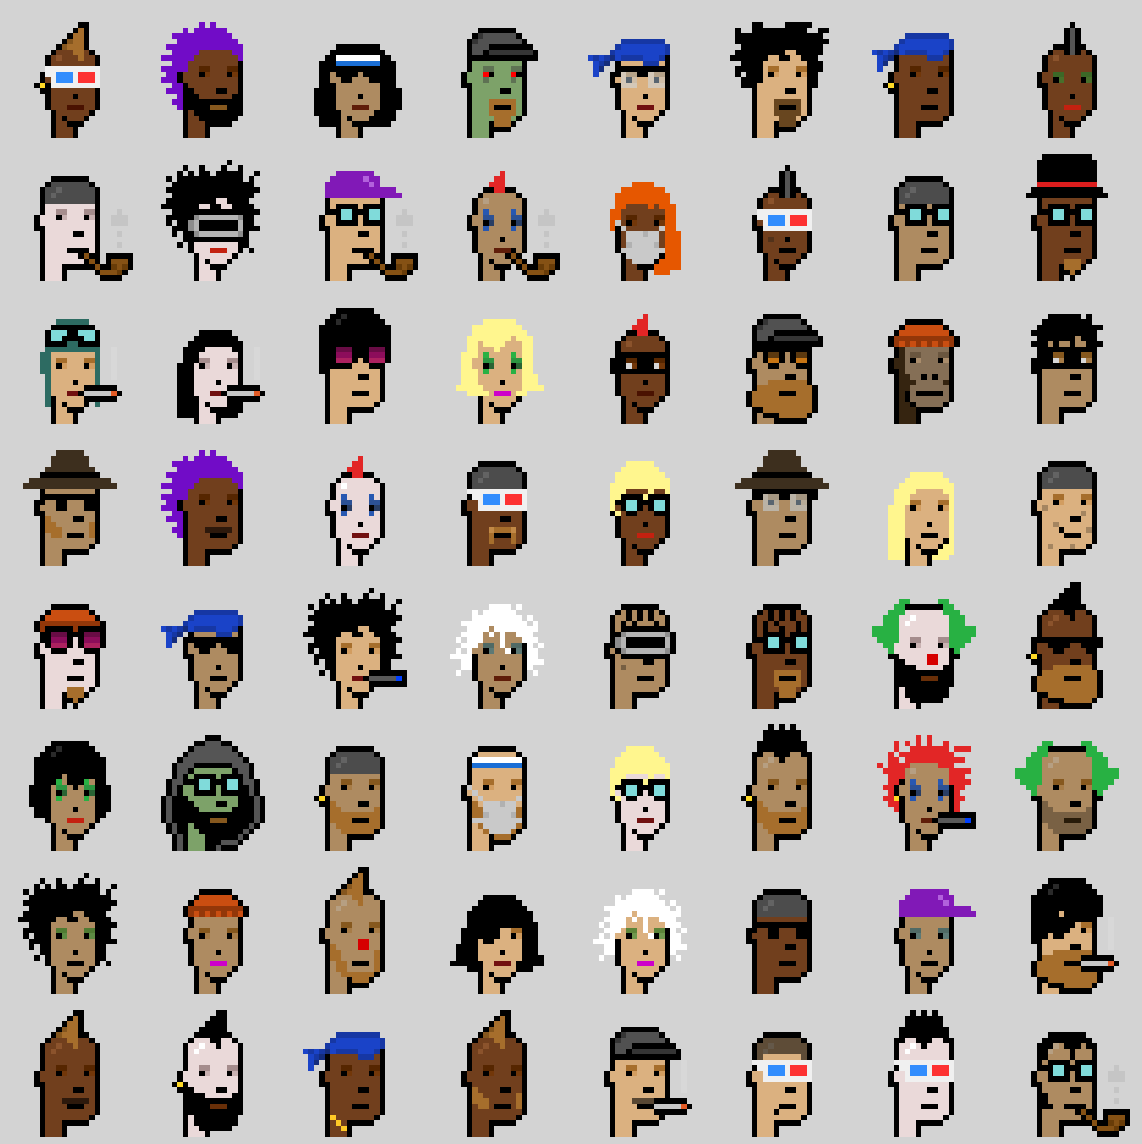

In [ ]:
plotimgs(faces, 8, filename="punks.png")

With $10 000$ possibilities, there are many faces that may appear, with a great number of accessories, like 3D-glasses, cigarettes, clown-noses and makeup, as well as different hairstyles and -colors. There are however some similarities, especially in the way the faces are constructed. To find some common features, it is serviceable to plot the mean of the pictures, to observe which parts remain relatively constant and which varies the most.

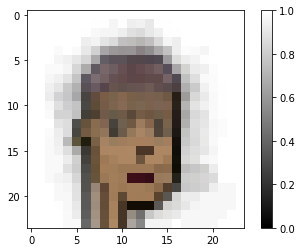

In [ ]:
faces_mean = np.mean(faces, axis=-1)  # Calculates the mean of pictures, along each color channel
plt.imshow(faces_mean, cmap='gray')  # Plotting the picture in grayscale
plt.colorbar()
plt.savefig('singlepunk.png')

The mean is plotted in grayscale, since the aim is to analyze the structure of the faces, and therefore the colors does not matter too much. It is observed that there are multiple parts of the pictures that are identical. One example is the bottom of the chin, where there are three pixels which always are colored black. The same applies to the right side of the face. Furthermore, there are multiple parts that are not identical in all images, but similar in a large part of them. For example, are there multiple people where the ear is not visible, but most of the cyberpunks have ears, even though both the shape and placements vary. Therefore, the edge of the ear is not as evident as the lower chin, but it is still quite visible. The same applies for the eyes, nose and mouth as well. The area around the relatively noticeable face is a bit noisy, mostly caused by all the different accessories. Since the variation in these are great, it is difficult to distinguish any special features, except for the cigarette. It is however possible to determine that there are often more colored pixels at the top of the head, and to the right of the mouth, than the in the rest of the pictures. This indicates that there are more accessories which are situated in these locations, than in the rest of the image.

There is also a large part of the $24 \times 24$ pixels that always stays white. For example, there are two columns to the left that never is colored, as well as one to the right. These three columns will be linearly dependent, and therefore decrease the rank of the matrix. Since this may apply to each of the color channels, the total rank of the face-matrix may be reduced by at least nine. The actual rank of the matrix can be found by finding the number of non-zero singular values, using the SVD-algorithm. This algorithm should be used on a $m$x$n$-array containing the RGB-channels only, as this is the interesting data. Therefore, the opacity-channel is first removed, and the rest of the matrix reshaped, before the SVD is calculated. 

In [ ]:
faces_opacity = faces[:,:,3,:]  # Saves the opacity-channel
faces_rgb = faces[:,:,:3,:]     # Saves the rgd-channels 
shape = faces_rgb.shape         # Saves the shape for faces_rgb

# Reshaping the matrix the NMF will be applied to
faces_reshaped = faces_rgb.reshape(np.prod(shape)//N, N)

In [ ]:
U, Sigma, V_T = np.linalg.svd(faces_reshaped)  #calculating SVD
Sigma[np.abs(Sigma)<1e-12] = 0   # Clips low values to zero

rank_SVD = np.count_nonzero(Sigma) # Finding rank with SVD
rank_linalg = np.linalg.matrix_rank(faces_reshaped)  # Checking the result

print(f'Number of non-zero singular values using SVD: {rank_SVD}')
print(f'Rank of matrix using np.linalg.matrix_rank: {rank_linalg}')

Number of non-zero singular values using SVD: 374
Rank of matrix using np.linalg.matrix_rank: 374


With a rank of $374$, the column- and row space will both have a dimension of this size. All of the $500$ possible pictures selected will consist of a total of $374$ different accessories and characteristics. Having now gotten a superficial idea of the dataset, one can calculate the NMF of the 3 color channels to observe to what extent certain features can be represented in the factorization. The method was explained in the beginning of this section, using $d = \{32, 64, 374\}$. The columns of $W$ are plotted as interpreted RGB images, by reshaping each column to a $24 \times 24 \times 3$ array and applying the handed-out plotting function.

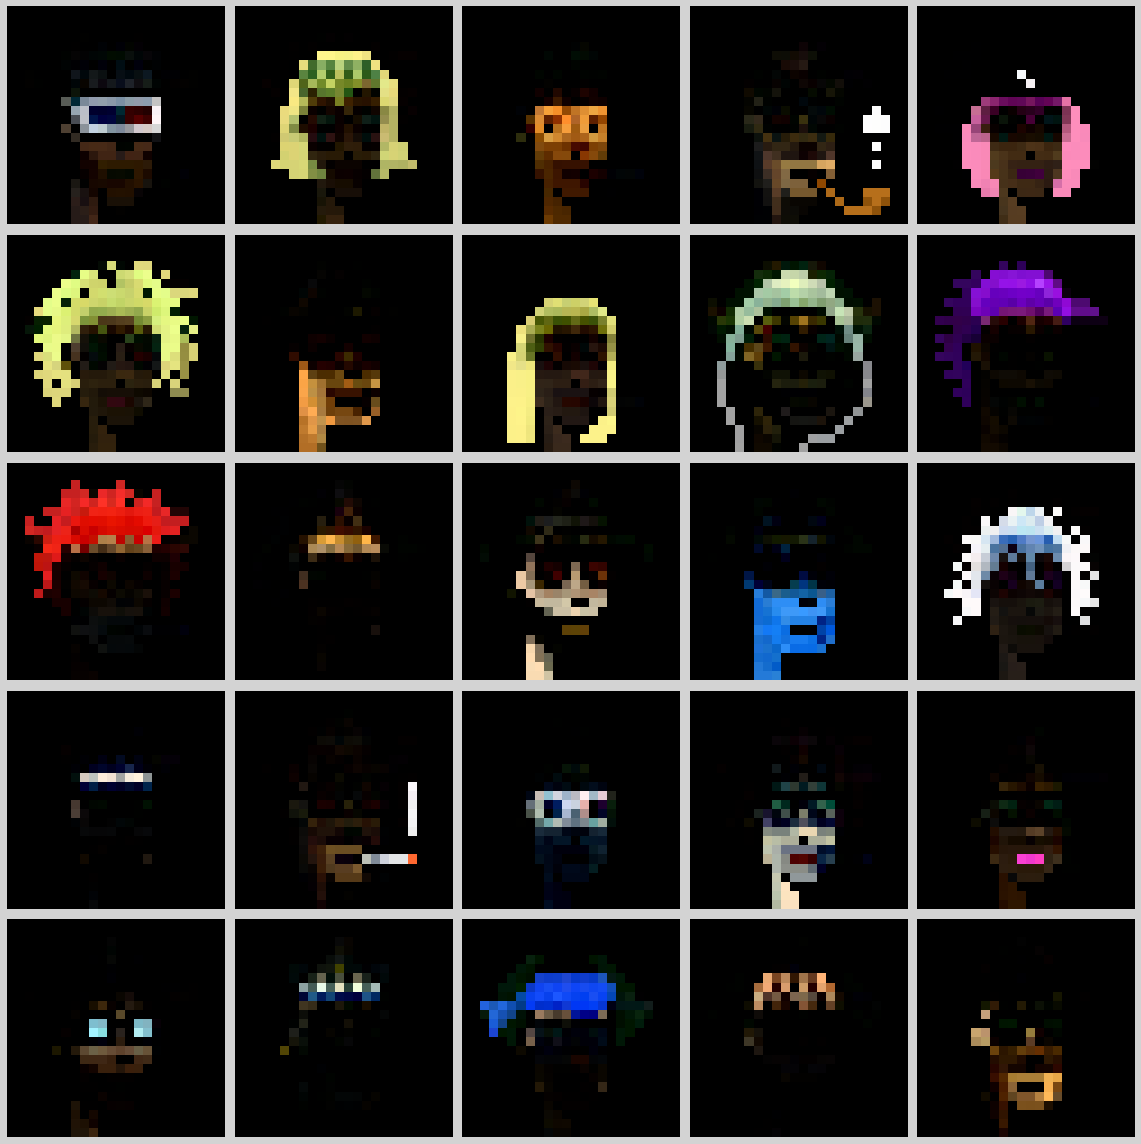

W for d=32


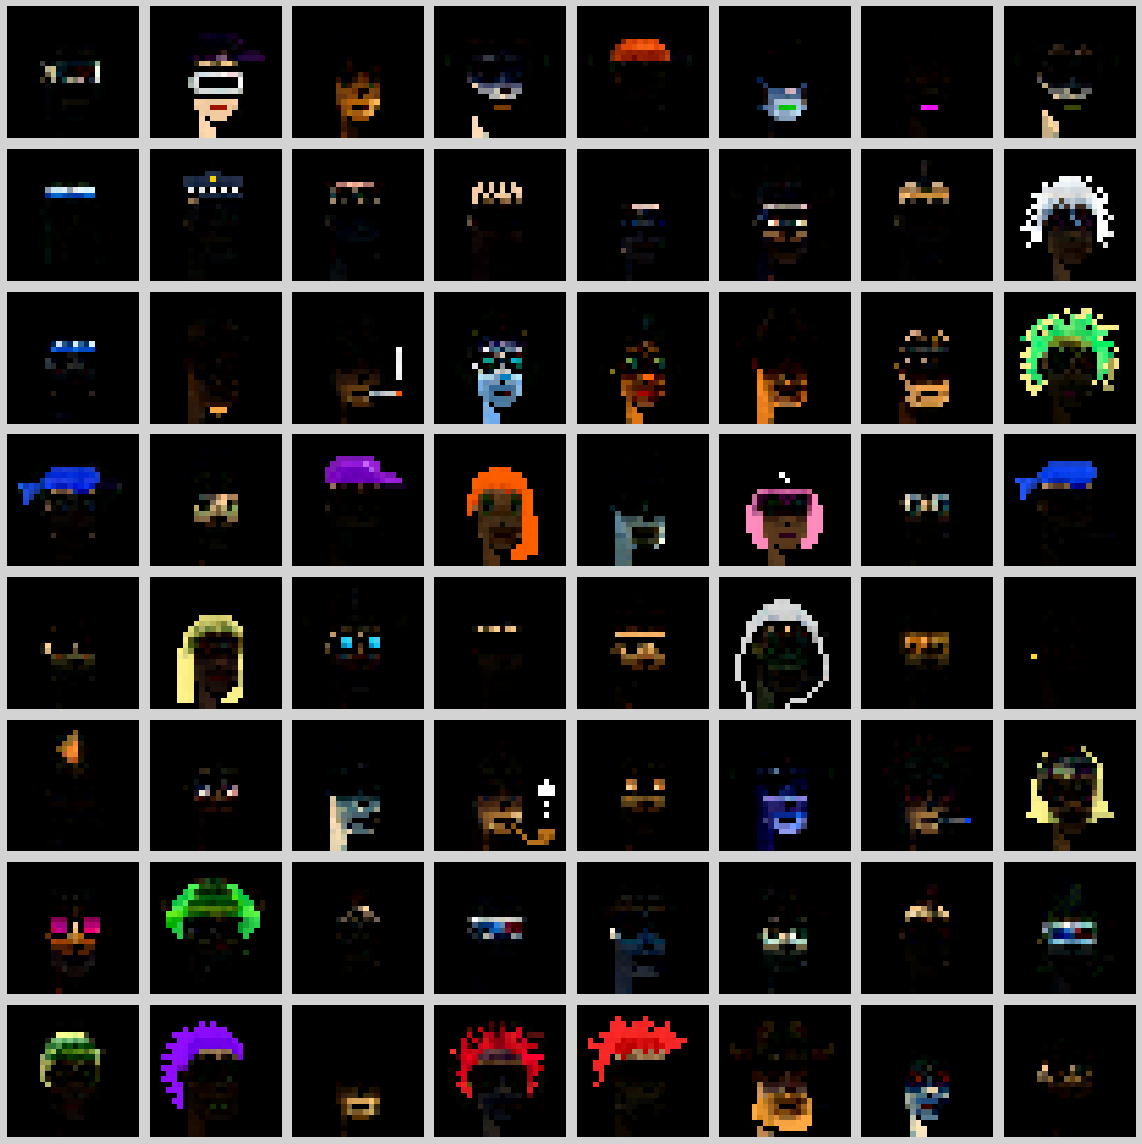

W for d=64


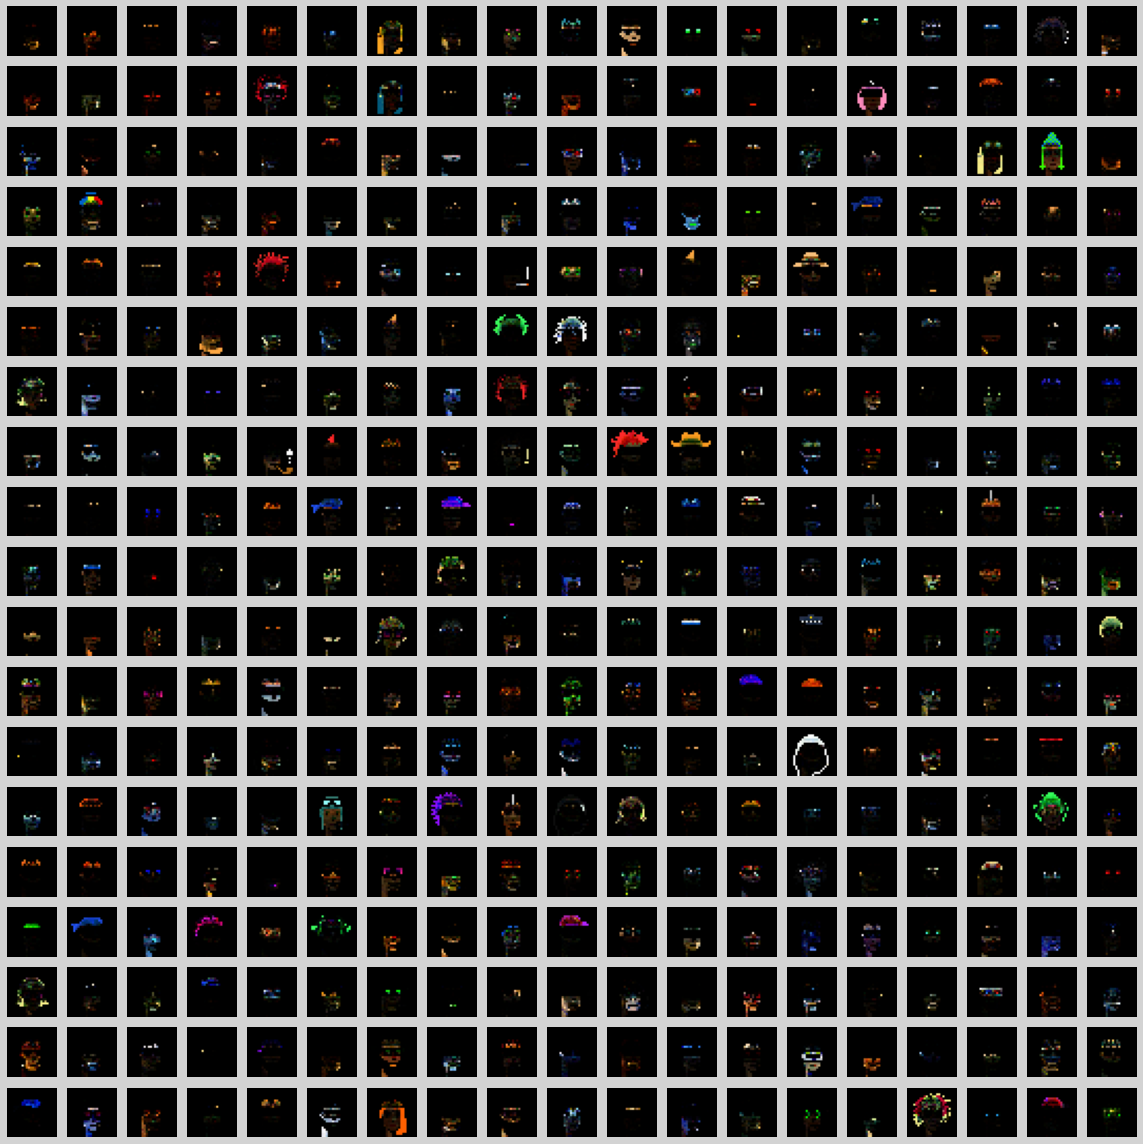

W for d=374 (rank)


In [ ]:
d = 32

W, H, _ = NMF(faces_reshaped, d)
W_reshaped = W.reshape((24, 24, 3, d))

plotimgs(W_reshaped, nplot=int(np.floor(np.sqrt(d))), filename="W32.png", rescale=True)
print(f'W for d=32')

d = 64

W, H, _ = NMF(faces_reshaped, d)
W_reshaped = W.reshape((24, 24, 3, d))

plotimgs(W_reshaped, nplot=int(np.floor(np.sqrt(d))), filename="W64.png", rescale=True)
np.savez('NMF64', d = d, W = W, H = H, W_reshaped = W_reshaped) # Saves the data for later use
print(f'W for d=64')

d = rank_SVD

W, H, _ = NMF(faces_reshaped, d)
W_reshaped = W.reshape((24, 24, 3, d))

plotimgs(W_reshaped, nplot=int(np.floor(np.sqrt(d))), filename="W_rank.png", rescale=True)
np.savez('NMFrank', d = d, W = W, H = H, W_reshaped = W_reshaped) # Saves the data for later use
print(f'W for d={rank_SVD} (rank)')


It is observed that the $W$-matrix includes most of the elements in the original faces. Due to a degree of misrepresentation, some of the accessories are more difficult to recognize. This happens mostly to the features that have low contrast to the face itself, like in the case of when the brown beards are attached to some of the darker faces. Here there are multiple pixels that are either misplaced or have the wrong color. In addition, the algorithm struggles to remove excess pixels, which leads to the $W$-matrix containing similar pieces, but with different residues from different faces. This can be seen with the blue cap, in the plot with $d=64$, where the only difference is the residue pixels. However, if the contrast is high enough, the NMF algorithm manages to perfectly sort out even single pixels. A good example is the earpiece, which is recreated without any noticeable error. The explanation is due to the placement, as the contour of the ear is always black, which gives a large color difference. 

Another observation is that the clearness of the pictures increases for the value of $d$ in the interval $32 - 374$. For $d=32$, the degree of the NMF algorithm tends to mix different elements, like the purple cap and the purple hair. In the case of $d=64$, this is much less frequent. The colors are also more similar to the ones in the original picture, and the accessories stand more out from the faces. However, the result is far from perfect for this size of $d$. Deviations include the hair that is green and yellow at the same time, instead of just the former. In addition, some faces are not distinguished from the accessories, leading to a diffuculty in identifying all of the attachments.

Since the rank of the matrix containing the color channels is $374$, it is expected that $d=374$ would give the best possible reconstruction of the accessories, with all components included, and without many errors. This is however not the case, even though the improvement from $d=64$ is quite large. Most of the deviations include a great number of superfluous pixels, like in the case of the green hat, where a large part of the face is visible. All accessories are included though, and some are perfect approximations, like the white hood. There is therefore a potential for improvement, but a value of $d=374$ provides a significantly better decomposition than $d=64$.


Knowing the different features stored in the NMF factorization, another way to test the algorithm's effectiveness is to look at how well the reconstructions $WH$ represent the original plot. The two datasets are presented for both $d=64$ and $d=374$.

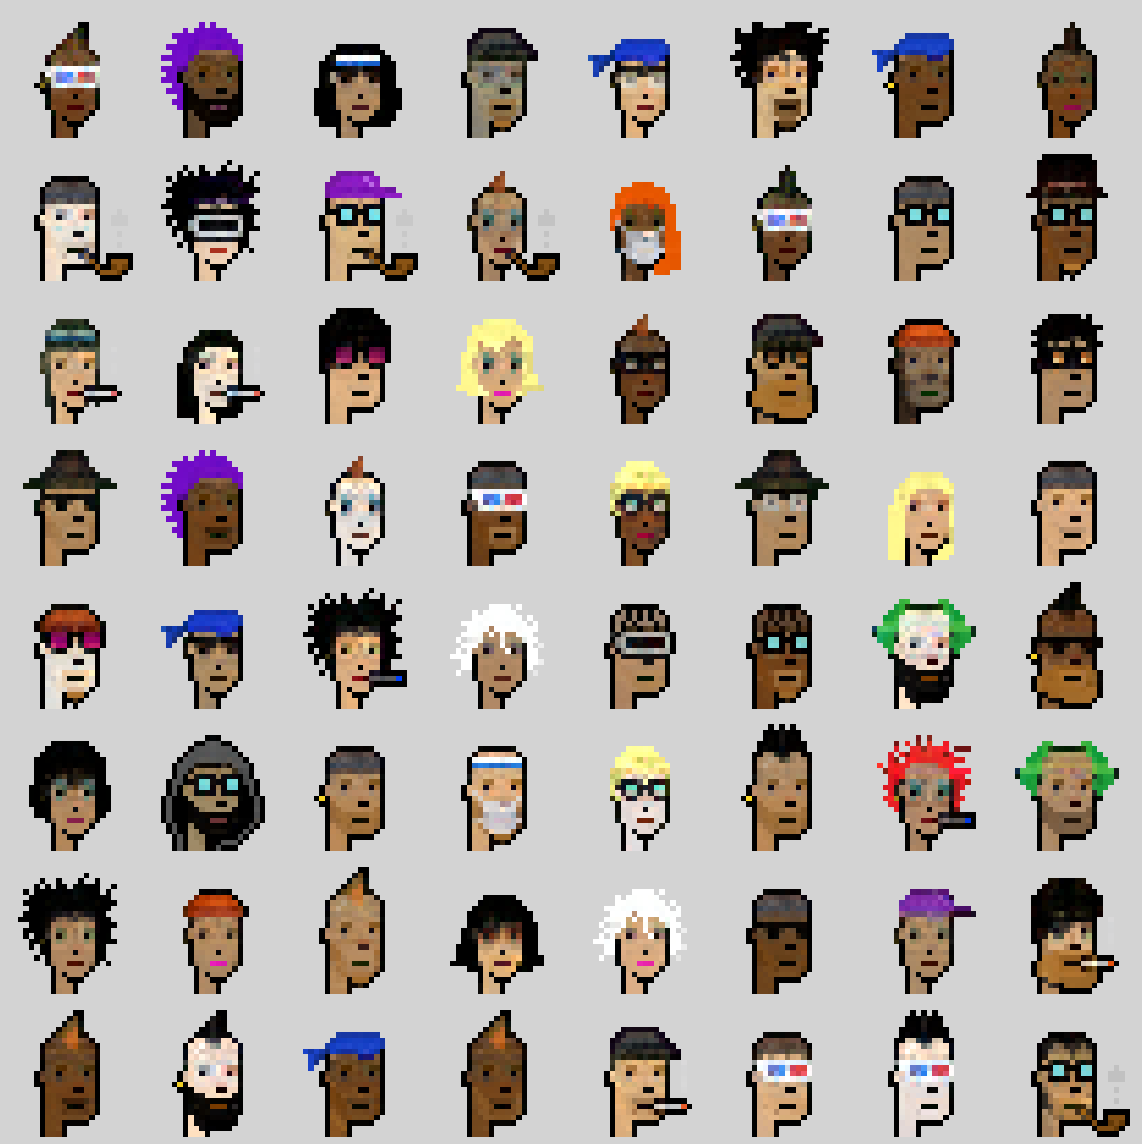

Above: NMF-reconstruction. 
Below: Original picture.


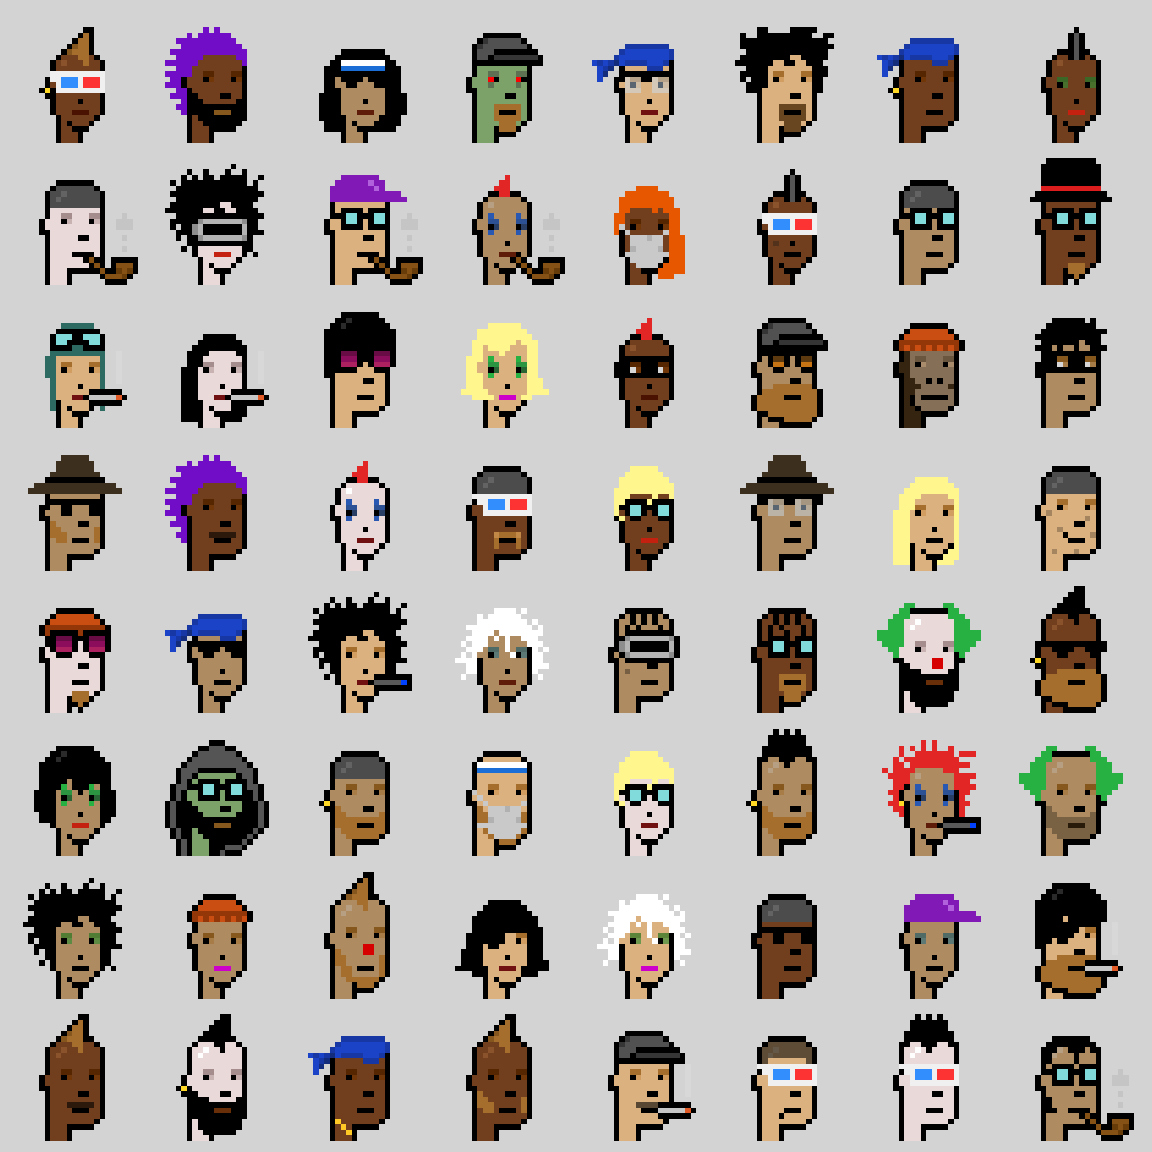

In [ ]:
data_64 = np.load('NMF64.npz')  #Fetching data from the results with 64
W = data_64['W']
H = data_64['H']

WH_with_opacity = np.zeros(faces.shape)
WH = W@H
WH[WH>1] = 1  #Manually clips all values above 1 to 1
WH_with_opacity[:,:,:3,:] = WH.reshape(faces_rgb.shape)
WH_with_opacity[:,:,3,:] = faces_opacity

plotimgs(WH_with_opacity, filename="WH.png")

print("Above: NMF-reconstruction. \nBelow: Original picture.")

display.Image("punks.png")

NMF-reconstruction with d=374.


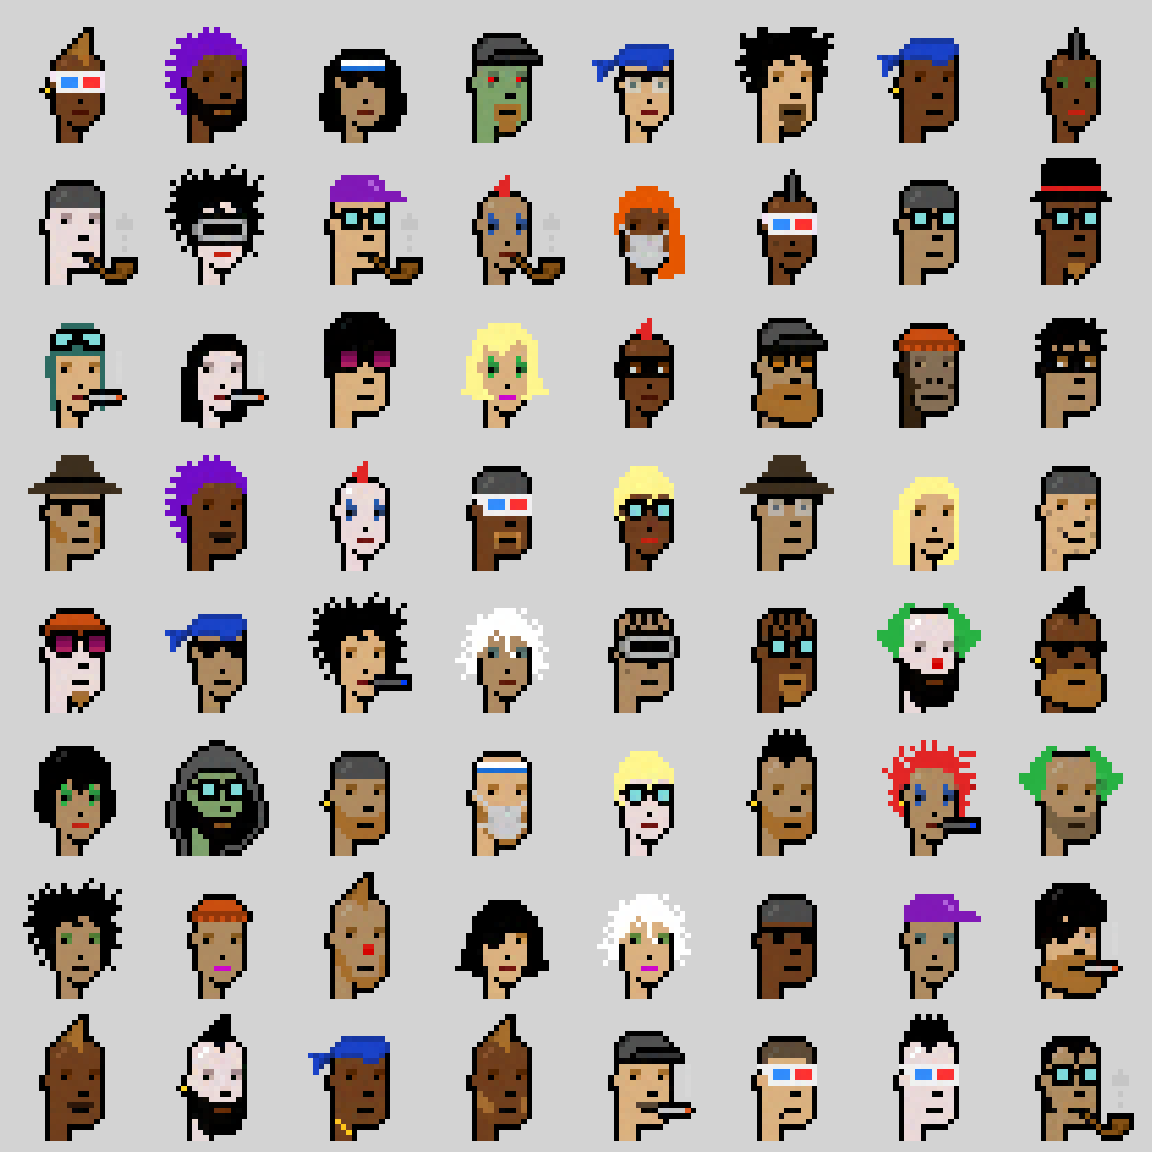

In [ ]:
data_rank = np.load('NMFrank.npz') #Fetching data from the results with d=rank
W_rank = data_rank['W']
H_rank = data_rank['H']
d_rank = data_rank['d']

WH_rank_with_opacity = np.zeros(faces.shape)
WH_rank = W_rank@H_rank
WH_rank[WH_rank>1] = 1  #Manually clips all values above 1 to 1
WH_rank_with_opacity[:,:,:3,:] = WH_rank.reshape(faces_rgb.shape)
WH_rank_with_opacity[:,:,3,:] = faces_opacity

plotimgs(WH_rank_with_opacity, filename="WH_rank.png") #Plotting only 64 of the faces
print(f'NMF-reconstruction with d={d_rank}.')
display.Image("WH_rank.png")

The reconstruction with $d=64$ represents the original faces relatively good. It is the same faces that are plotted, since most of the elements and colors are present, and the face shapes are almost faultless. However, there are a great number of deviations. One of the most noticeable is that the colors of the faces fluctuate, especially the pale ones. Instead of using the same color for the whole face, the colors vary quite rapidly in some areas, especially around the eyes. The reconstructed colors are not random, as they remain within mostly different shades of the original color, f.ex. lightblue in the case of the pale faces. This might also be because of the low level of contrast between the faces and their accessories. An exception is the so-called "zombie", ergo the green-colored person with red eyes. In the reconstruction, all of the green color has vanished and been replaced by a grayscale face. In addition, some of the accessories, like the yellow necklaces, have nearly disappeared in the reconstruction. The same yields for some of the beards, especially for the faces with darker skin tone, but here the contrast is much lower than for the necklace.

While the reconstruction for $d=64$ have a great number of deviations, the $WH$ with $d=374$ is almost faultless. The colors, the placement and the accessories are almost identical to the original, except for some lone pixels, like in the green hair. The reconstruction thus looks like a pretty good approximation. To find out whether this changes for the number of iterations and "factorization size", the local minima $\|A - W_kH_k\|_F$ is plotted for each iteration k, for $d = \{16, 32, 64, 128,374\}$.

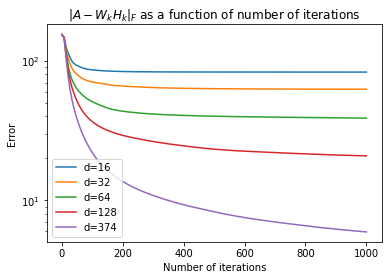

In [ ]:
d_array = np.array([16, 32, 64, 128, rank_SVD])

plt.figure()
for i in range(len(d_array)):
    _, _, norm = NMF(faces_reshaped, d_array[i])
    plt.plot([i for i in range(1, 1001)], norm, label=f'd={d_array[i]}')
plt.semilogy()
plt.legend(); plt.title('$\|A - W_kH_k\|_F$ as a function of number of iterations')
plt.xlabel('Number of iterations'); plt.ylabel('Error')
plt.savefig('Error_as_function_of_iterations.png')
plt.show()

The first noticeable  quality of the curves, are that most seem to converge within $1000$ iterations. The larger $d$ gets, the longer it takes before the algorithm converges. They all take the shape of an inversely proportioned function, and since they are always decreasing until they become constant at the point of convergence, all of the curves satisfy equation $(1)$. The curve for $d=128$ looks like it has a slope at $1000$ iterations. However, since it has flattened extensively compared to lower iterations and it has the same overall shape, it will probably converge given enough iterations. The probability of convergence increases with the number of iterations, because the algorithm is given more time to find the best solution. The point of convergence increases with $d$, because the amount of information is larger.

It is also worth noting that the errors decrease with an increasing $d$. This is because  the rank of the dataset is $374$, and there is not a plot for $d>374$. It is then expected that the error will increase if $d$ is further increased past $374$, which is expected to be the lowest error. It is not visible from the plot that the error for $d=374$ converges. However, since the curves for $d = \{16, 32, 64\}$ converged, it is safe to assume that the error for the rank of the dataset also has a convergence point. Here it is also helpful to look back at the plot for the errors of the $A_4$ matrix. There the plot for $d = \text{rank}A_4$ did not converge after $5000$ iterations. To save time, this plot is capped at $1000$ iterations. Thus, it is a bit unfair to expect that the algorithm for $d=374$ will converge after "only" $1000$ iterations. 

The exact dependence of the sizes of the decomposition matrices can be examined by applying NMF and calculating $\|A - WH\|_F$ for a wide range of $d$. This error of the approximation is then plotted as a function of $d$. To hopefully allow the algorithm to converge, the maximum number of iterations i set to $1100$. 

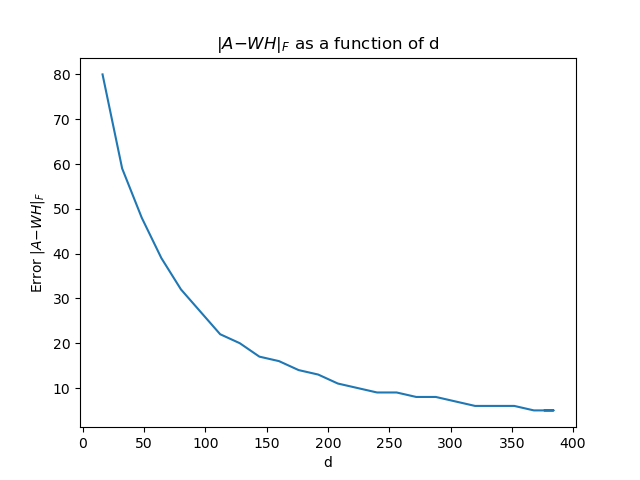

In [ ]:
d_array = np.array([i for i in range(16,401, 16)])
d_array[-1] = rank_SVD
norm_array = np.zeros_like(d_array)

plt.figure()
for i in range(len(d_array)):
    _, _, norm = NMF(faces_reshaped, d_array[i], Maxiter=1100)
    norm_array[i] = norm[-1]
plt.plot(d_array, norm_array) #, label=f'd={d_array[0]}')
plt.title('$\| A − WH \|_F$ as a function of d')
plt.xlabel('d'); plt.ylabel('Error $\| A − WH \|_F$')
plt.savefig('Error_as_function_of_d.png')
plt.show()

np.savez('error_as_function_of_d', d = d_array, norm = norm_array) # Lagrer dataene
# display.Image('/work/Siste gjennomkjøring/Error_as_function_of_d.png')

Just as could be partly observed in the previous plot, the error of the reconstructed NMF will decrease as the sizes of $W$ and $H$ increase. The error curve seems to be inverse proportional to $d$, where larger factorization matrices can store more information, here in the form of more features, colors and other necessary information about the images. At some point however, a minimum error is expected to be reached. According to the introductory explanation of NMF's properties, this value should be reached when the $d$ is equal to the rank of the reshaped matrix of the original image-dataset. It is observed that the rank yields the lowest error of the interval $d\in[16,374]$. Since there is no plot for values of $d>374$, it is not possible to determine whether $374$ is the "factorization size" that gives the lowest error or not. However, according to the curve, the error will continue to decrease or stay constant. The error seems to be inversely proportional to $d$, with the same shape as the error as a function of max iterations. However, since this plot does not have logarithmic axis, it does not decrease as dramatically as the other functions with max iterations on the $x$-axis.

It is worth mentioning that the Frobenius norm used to calculate the difference between the original and reconstructed dataset may not be an optimal choice of determining the "distance" or difference between such image-sets. Human eyes are not able to detect if all pixels in an image have been shifted by a small value, while the sum of all these deviations may result in a large reconstruction error using such a norm. A computational calculation may thus yield larger differences in the norm for humanly indistinguishable color-deviations. It may also yield a smaller error for differing features of the CryptoPunks, that a human would be more aware of. One can however hope these differences cancels out to give a reasonable value of $\|A - WH\|_F$.

#### Denoising

So far, various properties of and potential limitations of Non-negative Matrix Factorization has been discussed and looked into. A unique feature of this method however, beyond learning about how compact representations can be useful for understanding data, is its ability to perform a wealth of tasks including image denoising. Noise, in this context, refer to unwanted modifications and disruptions of a signal, here being the images. The method considered is additive Gaussian noise, modifying the original matrix in a manner $A_{noisy} = A + \sigma E$. $\sigma > 0$ is a scalar noise level and $E$ is a matrix with the same shape as $A$ where all
components are assumed to be realizations of the standard normal distribution $\mathcal{N}(0,1)$. In such a Gaussian noise, each pixel in the image will thus be changed from its original value by a usually small amount. By the central limit theorem, one can then expect that the sum of different noises will tend to approach a Gaussian distribution. The noise values at different pixels can also be assumed as being independent and identically distributed, and hence uncorrelated.

#### Noise-model and NMF
We'll continue to assume the opacity channel is known, and the added noise is just applied to the three color channels. The noise only appears on color channels that are non-zero in that pixel, and the resulting image is rescaled by clipping pixel values to lie between 0 and 1 after adding noise, to remain plottable. Thus, black pixels and the background will be noiseless, and pixels where some of the RGB colors are 0 will only have noise on the non-zero colors. This model will therefore not be purely additive Gaussian, but will luckily still be applicable to investigate with the NMF dimensionality reduction method.

To study NMF's noise removal properties, we'll fit an NMF to a dataset with added noise, $A_{noisy}$, and the reconstruction $W H$ will then contain denoised reconstructions. Non-negative Matrix Factorization, and other lower dimensional representation of data, is constructed to remove redundant information, and the algorithm will thus naturally remove potential noise. The columns $W$ can also be interpreted as containing a mean of many noisy images with the same feature, resulting in deviations cancelling out and a hopefully denoised reconstruction. The quality of the reconstruction will depend on $d$, as the NMF will learn more of the original noisy dataset. An appropriate factorization size therefore has to be considered, to find a suitable balance between an accurate reconstruction and a minimal amount of noise. The goal is to learn information about the underlying structure of the data while simultaneously discarding information about the noise. Resulting problems may then be those of overfitting - the model fits the noise and not the underlying structure - or underfitting - the model is unable to capture the complexities of the data. This part of machine learning is related to the model's complexity.

The approach taken to apply NMF is in this case unsupervised, meaning that the denoising model is fitted only with noisy data, with no knowledge of the noiseless data. This is a less effective, but significantly less computationally expensive method. A supervised approach is also much more prone to overfitting. Unsupervised denoising methods can be used when original noiseless images are not available, but as the images here are accessible before simulating the noise, the effectiveness of the NMF method can thus be compared and assessed.

#### Noising and denoising CryptoPunks
A handed-out code will be used to add noise to the CryptoPunk-dataset, following the noise-model explained above. The noise level is chosen relatively high, in order for the human eye to observe the deviations, and to examine the NMF-method's denoising abilities. The scalar noise level $\sigma$ is set to $0.1$ for $N = 500$ images. A larger $N$ would yield much better denoising results, but can be computationally prohibitive.

The original dataset, reshaped into a matrix, is denoted $A$, while the matrix containing noisy images is denoted $A_{noisy}$. The deviation between them is calculated with the Frobenius norm. $64$ noisy CryptoPunks are plotted to observe the effect of the noise-model, along with $\| A_{noisy} - A \|_F$.

∥A_noisy − A∥_F: 41.69


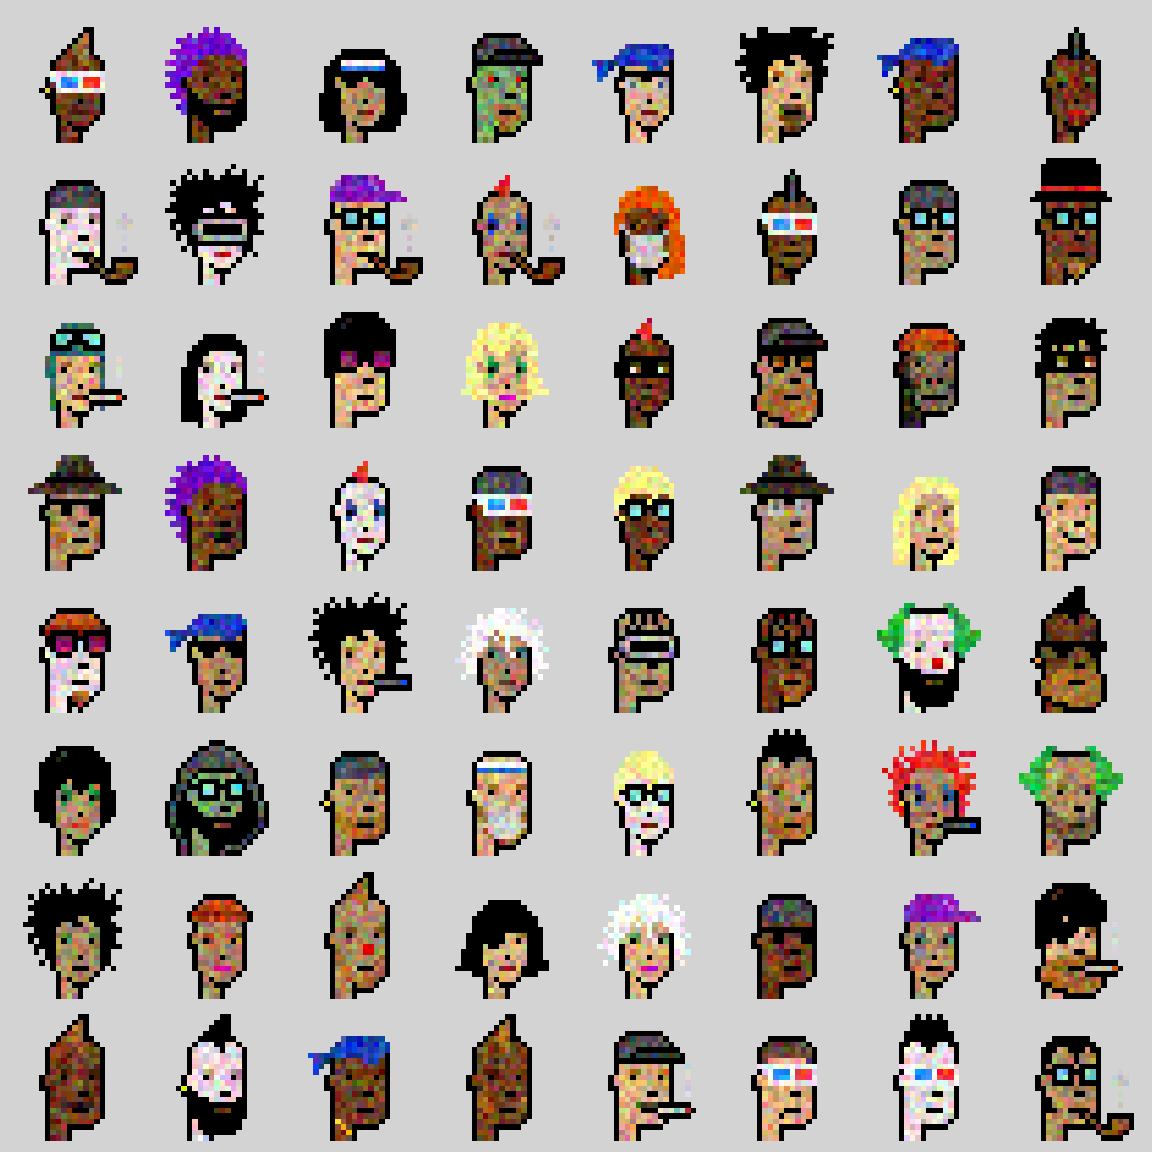

In [ ]:
# Handed out noise-maker
def add_noise(imgs_reshaped, sigma = 0.1):
    """
    Adds gaussian noise to images as described in text.
    Note that imgs must be given as a (24*24*3, N) numpy array, i.e the reshaped images
    Input:
        imgs_reshaped: (1728,N) numpy array
        sigma: scalar, noise level
    Output:
        noisy_faces: (1728,N) numpy array containing noisy images
    """

    # Array that will store the rgb channels of the noisy images
    noisy_faces = np.copy(imgs_reshaped)

    # Number of noisy values needed
    nnzero = faces_reshaped[np.nonzero(imgs_reshaped)].shape[0]

    # Sample noisy values and add noise
    noise = np.random.normal(0.0,1,nnzero)
    noisy_faces[np.nonzero(imgs_reshaped)] += sigma*noise

    # Clip to lie between 0 and 1, to still be interpretable as images
    noisy_faces = np.maximum(0.0,np.minimum(1.0, noisy_faces))

    return noisy_faces

noisy_faces = add_noise(faces_reshaped)  # Adding noise

# For plotting noisy images, the opacity is added
noisy_faces_with_opacity = np.zeros(faces.shape)
noisy_faces_with_opacity[:,:,:3,:] = noisy_faces.reshape(faces_rgb.shape)
noisy_faces_with_opacity[:,:,3,:] = faces_opacity

# Calculate the error of the noisy images
noise_residual = np.linalg.norm(noisy_faces - faces_reshaped, 'fro')
print(f'∥A_noisy − A∥_F: {noise_residual:.2d}')

# Plotting
plotimgs(noisy_faces_with_opacity, filename='faces_noisy.png')

The difference $||A_{noisy} - A||_F$ is significantly large, as expected with a relatively large scalar noise level.  Color-deviations are particularly visible on lighter features, such as fair skin or blonde hair, and many accessories have become difficult to make out, such as facemasks or makeup. Human eyes however work slightly differently than a computer, and it would be of interest to observe to what extent NMF is able to pick up on characteristics and repeating factors despite such noise modifications.

To observe the denoising property of dimensionality reduction methods, an NMF is fitted to the noisy image, using $d=64$. The columns of $W$ and the reconstructions $WH$ are subsequently plotted, both for the noisy dataset and the original noiseless set, to allow for comparison.

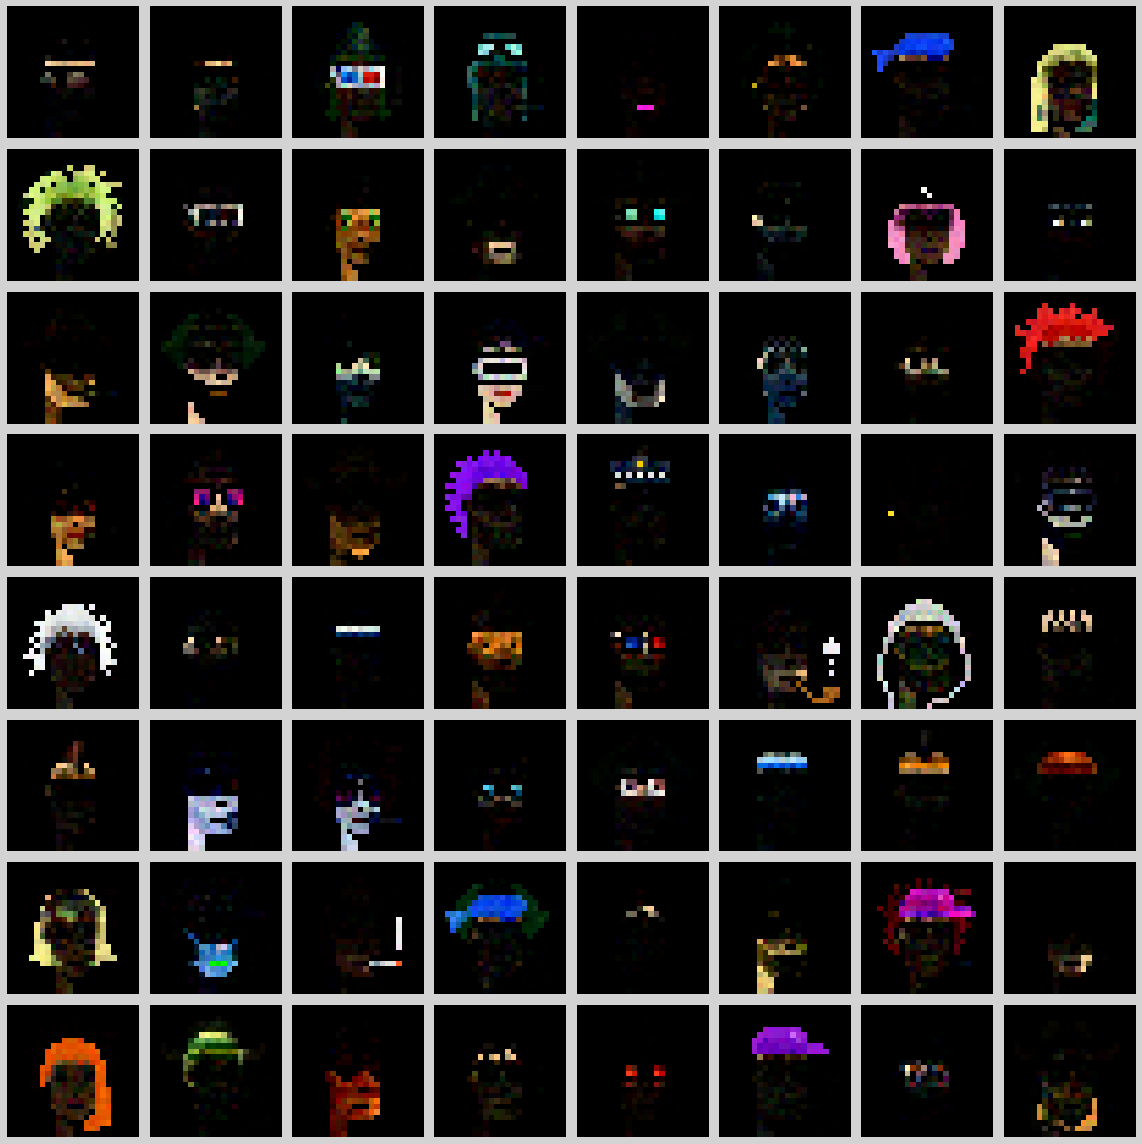

Above: W_noisy. 
Below: W_original


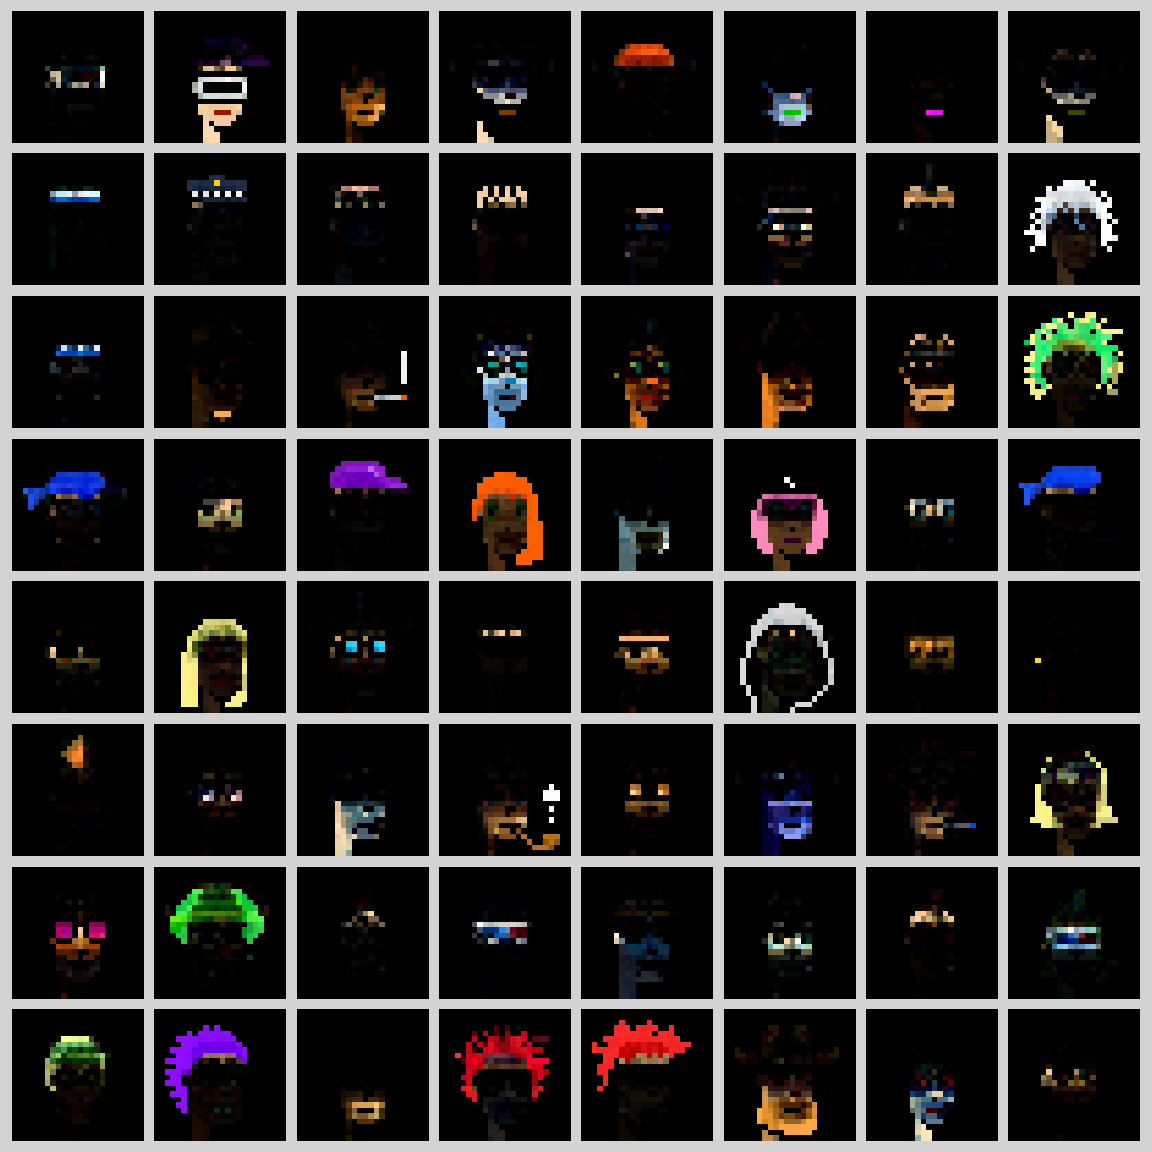

In [ ]:
d = 64

W_noisy, H_noisy, _ = NMF(noisy_faces, d)
W_noisy_reshaped = W_noisy.reshape((24, 24, 3, d))

plotimgs(W_noisy_reshaped, nplot=int(np.floor(np.sqrt(d))), filename="W_noisy.png", rescale=True)
# display.Image('/work/Siste gjennomkjøring/W_noisy.png')
print("Above: W_noisy. \nBelow: W_original")
display.Image("W64.png")


As observed in the very beginning, with the four simple matrices, the factorization $W$ and $H$ for different NMF's may be very different, yet still yield similar reconstructions $WH$. This is a result of the potential existence of infinitely many factorizations possible to achieve from NMF. A consequence is however that the columns of $W_{original}$ and $W_{denoised}$ won't contain the exact same features, or their placement may differ, making it slightly difficult to compare. Still, it is observable that the algorithm has removed some noise, and has retained many of the same parts as the noiseless $W$. Their differences are detectible with the human eye, and some noise is present, but an improvement from the noisy image is obtained. The NMF's effectiveness may be more evident when plotting the reconstruction $WH$ underneath.

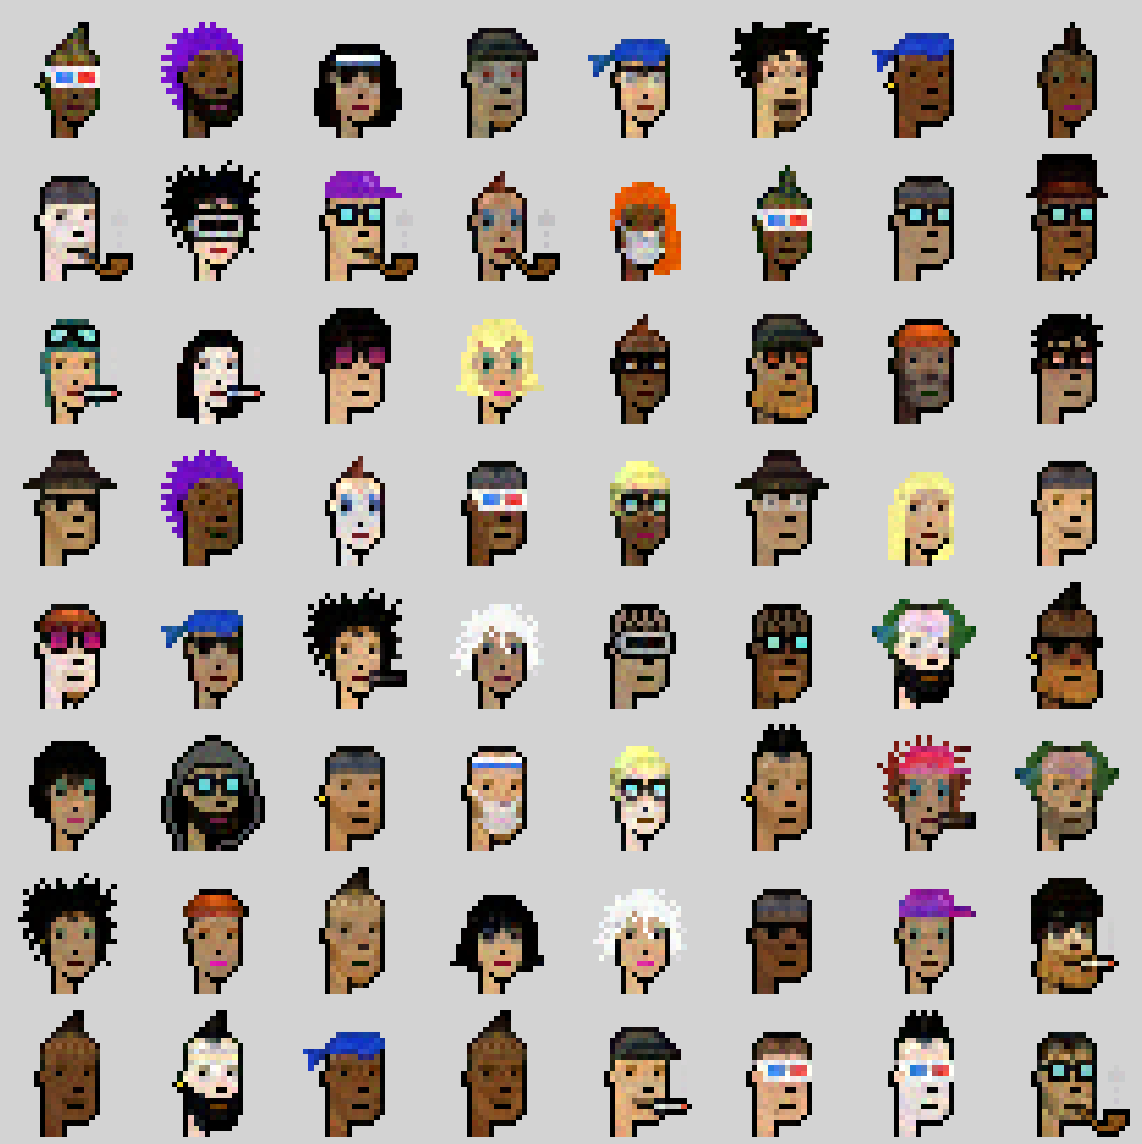

Above: WH_noisy. 
Below: WH_original


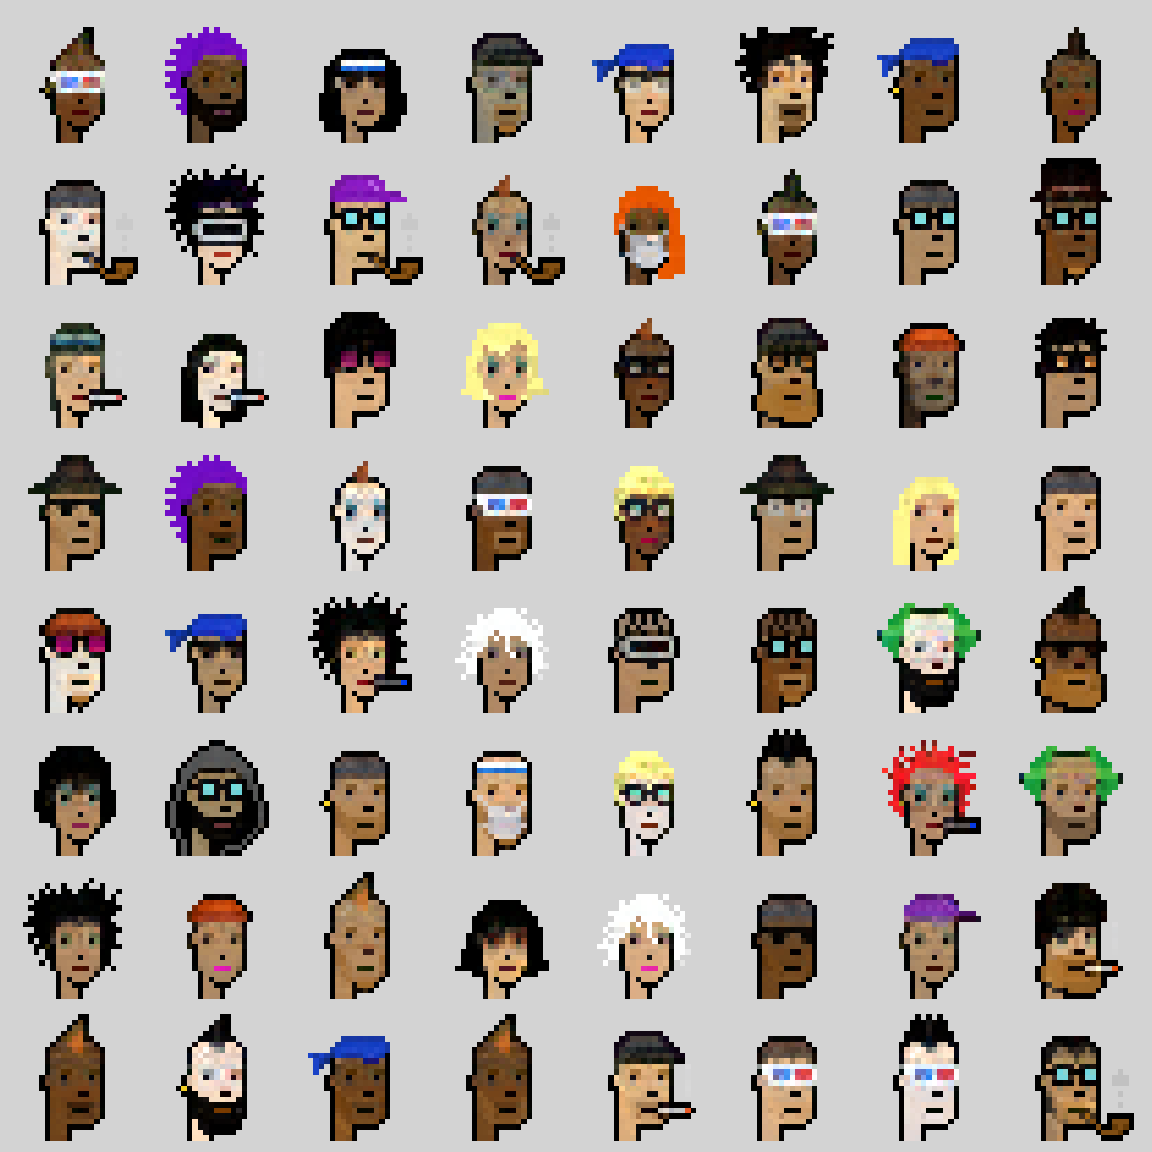

In [ ]:
WH_noisy_with_opacity = np.zeros(faces.shape)
WH_noisy = W_noisy@H_noisy
WH_noisy[WH_noisy>1] = 1  #Manually clips all values above 1 to 1
WH_noisy_with_opacity[:,:,:3,:] = WH_noisy.reshape(faces_rgb.shape)
WH_noisy_with_opacity[:,:,3,:] = faces_opacity

plotimgs(WH_noisy_with_opacity, filename="WH_noisy.png")
print("Above: WH_noisy. \nBelow: WH_original")
display.Image('WH.png')

When the factorizations $W_{denoised}$ and $H_{denoised}$ are multiplied together into the NMF-reconstruction of $A_{noisy}$, the denoising property of the dimensionality reduction factorization method becomes clear. The resulting set of images have become significantly less noisy, as a result of remaining noise in $W$ and $H$ canceling out when recombined. When compared to the NMF of the noiseless matrix, seemingly all images with their respective features have detected and recreated. One observed commonality between $WH_{noiseless}$ and $WH_{denoised}$, is the difficulty of detecting the character's facemasks when appearing on light-skinned CryptoPunks, as the color-contrast may not be significant enough. All characters whose eyes are not covered by any glasses also seem to have become relatively identical. This common discrepancy between the NMF of the noisy and noiseless dataset proves that the algorithm functions almost identically regardless of whether noise is present or not, making it an effective method of denoising. Some discoloration still remains in the reconstructed noisy image, but compared to the unaltered matrix, an indisputable improvement has been achieved.

The last property of interest is the denoising NMF's dependence on $d$. The NMF of a noiseless dataset was observed to be of an increasing accuracy for increasing $d$, up until reaching the rank of the original matrix, as the algorithm learned more information about and was able to store more features of the images. The NMF of a noisy image would however not be expected to possess the same quality, as increasing the amount of data the factorization can learn would result in more of the noise being detected and reconstructed. A factorization size $d$ too low would simultaneously result in a poor reconstruction, as $W$ would not be able to pick up on all the necessary features. When fitting an NMF to the noisy images for a wide range of $d$ and calculating the reconstruction error $\displaystyle \| A_{noiseless}-WH_{denoised} \|$, one would therefore assume a plot of the NMF's error as a function of $d$ to decrease in the beginning, until reaching a minimum, and then increasing as the factorization size becomes bigger.

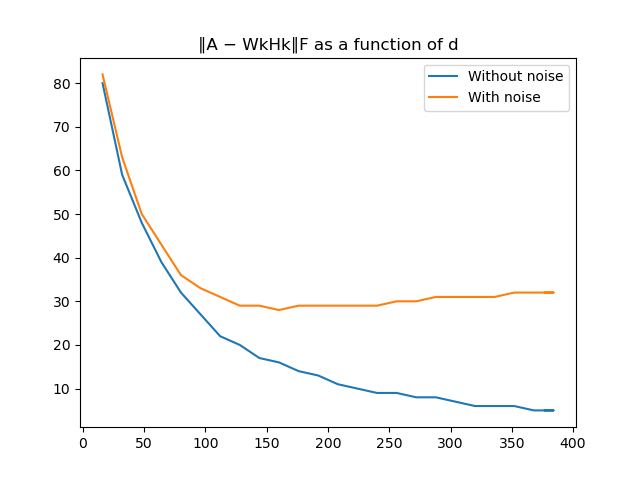

In [ ]:
data_not_noisy = np.load('error_as_function_of_d.npz')  #Fetching data from the results without noise
d_array = data_not_noisy['d']    # Plotting with the same ds for better comparability
norm_array = data_not_noisy['norm']
norm_array_noisy = np.zeros_like(d_array)

plt.figure()
for i in range(len(d_array)):
    W_noisy, H_noisy, _ = NMF(noisy_faces, d_array[i], Maxiter=1000)
    norm_array_noisy[i] = np.linalg.norm(faces_reshaped - (W_noisy @ H_noisy), "fro")
plt.plot(d_array, norm_array, label=f'Without noise')
plt.plot(d_array, norm_array_noisy, label=f'With noise')
plt.legend()
plt.title('$\|A − WH \|_F as a function of d')
plt.savefig('Error_as_function_of_d_noisy.png')
plt.show()

# Quite heavy computation,so this was done in a previously setting. The code was still the same
# display.Image('/work/Siste gjennomkjøring/Error_as_function_of_d_noisy.png')

The reconstruction error for the noisy images results in an expected function, having a minimal value for a factorization size $d$ giving an optimal balance between needing enough information to reconstruct the dataset, while not storing too much of the noise-information. The error of a $d$ less than this minima for the denoised reconstruction follows a path close to the noiseless reconstruction, as both NMF's run into the problem of underfitting. In both cases, when $d$ is low, the factorizations are not able to capture the complexities of the data. When too few features and less color-information is stored, the resulting reconstruction will be poor regardless of the amount of noise. When $d$ approaches its noisy minima, the overfitting and underfitting is balanced for $WH_{denoised}$, while the error of the noiseless $WH$ is considerably smaller considering the NMF does not have to account for the same color discrepancies. A further increase in $d$ will increase the noiseless reconstruction's accuracy, as the approximation becomes better and better, until expectingly stagnating when reaching the original matrix's rank. The denoised reconstruction however runs into the problem of overfitting, and begins to reconstruct the noise of $A_{noisy}$, thus increasing its reconstruction error to the noiseless $A$. The error of the noisy image's reconstruction will resultingly display something between a U- and an L-shape, where the observed best fit occurs at a value $d \approx 160$. This is a bit smaller than half of the rank of the original matrix, and roughly a third of the rank of the noisy matrix, likely because the high value of noise chosen means that the matrix factorization has to discard a lot of information in order not to reconstruct too much noise.

#### Conclusion
It is vital in the world of increasing data to find methods for reducing the amount of data, removing redundancies and extracting important structures. We have in this project studied one such method, by applying non-negative matrix factorization as a form of dimensionality reduction. NMF, as it's abbreviated, is a linear, non-negative approximate data representation. The non-negativity fits the intuition that parts are generally combined additively to form a whole. These constraints might hence be useful for learning parts-based representations of complex data. It has been insightful to get an introductory understanding  of how to efficiently compact data into meaningful representations, as such techniques are utilized in many applications used and sites visited on phones and computers, in addition to being an important field in the development of technology.

Lee and Sung's NMF algorithm has in this project been applied to a dataset of images, where each image has a heigh and width of 24 pixels, each having 3 color channels and an opacity channel of one or zero. The algorithm produces an approximation $A_{NMF}$ of a reshaped matrix $A$ of the RGBA image-set, by factorizing the data into two smaller matrices $W$ and $H$. Particularly the $W$-matrix is a part based representation of data, containing intuitive features of interest within the image-set. When combined, we achieve a reconstruction $WH$ of various accuracy depending on the dimensionality of the factorization-matrices. Properties of other factorization methods lead to an expectancy of a decreased reconstruction error for an increased factorization size, with an optimal approximation for a dimensionality equal to the rank of the matrix the NMF is applied to. This could be observed when plotting the error as a function of dimensionality, reaching a minima at a value of $d=374$. 

While such a dimensionality would result in a near perfect reconstruction, we observed that the NMF method was sufficiently effective for a dimensionality closer to a more computationally beneficial value of $64$. The algorithm proposed was able to store many of the repeating characteristics occurring in the dataset of images in the columns of its factorized matrix $W$, thus recreating quite a similar reconstruction $WH$ of the original matrix $A$. Some features with a small color-contrast to others, like facemasks on pale skin or beards on dark skin, in addition to lone pixels or small parts, such as necklaces or eye-makeup, were more difficult for the NMF to pick up on. It was however very efficient of detecting the common features of all the characters displayed in the CryptoPunk dataset, visually depicted in the mean image calculated, showing that the NMF method easily could reconstruct every image to have a headshape, some hairstyle or headwear, eyes or glasses, a nose, and a mouth. 

The NMF has proved to be advantageous in regards to factorizing and reconstructing a dataset of images containing simple characters with different qualities. The non-negative constraint of this method makes it particularly of interest in the task of image manipulation, as the resulting output of the algorithm could be plotted and compared next to the original dataset. It's computational speed decreased exponentially with an increased value of $d$, leading it not to be of highest priority if one wishes a perfect reconstruction, but in many analyses of large amounts of data, only certain commonalities and factors may be of interest. Redundant information can often be discarded by the use of dimensionality reduction methods, often much more than one would expect, as our computers are quite intelligent when it comes to pattern recognition and probabilities. The NMF could "predict" that each reconstructed image would be of a character with certain features, and most of the discrepancies from the original dataset came in the shape of slight discoloration and a loss of information about single pixels standing out from the mean.

The property of most interest for this project, was the ability of denoising by the use of NMF. An approximated Gaussian noise was added to the original CryptoPunk dataset, modifying each non-zero pixel in the image by a small amount. The resulting noisy set of images made it difficult for the human eye to distinguish the features previously evident, yet our factorization method was surprisingly efficient in this regard. While we in the field of denoising have to take into account a reasonable balance between overfitting and underfitting, a dimensionality of $d=64$ proved sufficient in the NMF's ability to simultaneously recognize most, if not all, features of interest, and reconstructing the images with a remarkable decrease in noise. While a factorization size closer to the perfect balance between overfitting and underfitting might have resulted in an improved approximation, a computationally beneficial smaller value was able to express the advantage of dimensionaly reduction when dealing with a disrupted signal.

This project has provided us with a relevant and interesting insight in the process of extracting vital information and disregarding redundancies in order to capture the features of highest interest in a complex dataset. The methods used in this regard in our daily life are slightly different, more complicated and more efficient, but they utilize many of the same properties of NMF. One of the most useful properties of NMF, spearating it from other factorization methods, is its ability to produce a sparse representation of the data. Such a representation uses fewer active components, making the encoding easier to interpret. The sparseness given by NMF is however unsupervised, and a more direct control over the properties of the representation is needed in many applications. It also produces a global rather than local representation, which was a beneficial property when utilized on the CryptoPunks, which had many shared features, but may not give an intuitive decomposition into parts in cases of higher variance. Studying the advantages and disadvantages of this method has still given us an insight of an important field of machine learning, which we may take with us into the future.

#### Sources

D. Lee and H. S. Seung, "Algorithms for Non-negative Matrix Factorization", in $\href{https://proceedings.neurips.cc/paper/2000/file/f9d1152547c0bde01830b7e8bd60024c-Paper.pdf}{\text{Advances in neural information processing systems}}$, Vol. 13, edited by T. Leen, T.
Dietterich, and V. Tresp, 2001. 

D. Lee and H. S. Seung, "Learning the parts of objects by nonnegative matrix factorization", in  $\href{http://lsa.colorado.edu/LexicalSemantics/seung-nonneg-matrix.pdf}{\text{Nature}}$, 1999.

P. O. Hoyer, "Non-negative Matrix Factorization with Sparseness Constraints", in $\href{https://www.jmlr.org/papers/volume5/hoyer04a/hoyer04a.pdf?ref=https://githubhelp.com}{\text{Journal of Machine Learning Research}}$, Vol. 5, edited by P. Dayan, 2004.

J. Kim and H. Park, “Toward Faster Nonnegative Matrix Factorization: A New Algorithm and Comparisons,” in $\href{https://faculty.cc.gatech.edu/~hpark/papers/nmf_blockpivot.pdf}{\text{2008 eighth ieee international conference on data mining}}$
(IEEE, 2008), pp. 353–362.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4d375e0c-2792-498f-b2b0-bdbf892901da' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>